In [1]:
# Import libraries to complete education project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import sklearn packages

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing  
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from pandas import DataFrame





In [2]:
# Import data

df = pd.read_excel('/Users/benjaminreimer/Desktop/Graduates and Completers by District, Gender, and Race_Ethnicity.xlsx')
print (df)

# Data is printed as dataset titled 'df'.

       County Name  Organization Code                       Organization Name  \
0              NaN                NaN                                     NaN   
1                              9999.0                            STATE TOTALS   
2                              9999.0                            STATE TOTALS   
3                              9999.0                            STATE TOTALS   
4                              9999.0                            STATE TOTALS   
5              NaN                NaN                                     NaN   
6            ADAMS               10.0                              Mapleton 1   
7            ADAMS               10.0                              Mapleton 1   
8            ADAMS               10.0                              Mapleton 1   
9            ADAMS               10.0                              Mapleton 1   
10           ADAMS               20.0              Adams 12 Five Star Schools   
11           ADAMS          

In [3]:
# Drop rows 0 and 5

df.drop([0,1,2,3,4,5])

# The first five rows were dropped above because they were the totals from all of the columns. 
# I wanted these to be excluded so that the main focus was the data without totals included.


,County Name,Organization Code,Organization Name,"""Class Of..."" Anticpated Year of Graduation Cohort",Number of Years After Entering High School,All Students Final Grad Base,All Students Graduates Total,All Students Graduation Rate,All Students Completers Total,All Students Completion Rate,...,Two or More Races Female Final Grad Base,Two or More Races Female Graduates,Two or More Races Female Graduation Rate,Two or More Races Female Completers Total,Two or More Races Female Completion Rate,Two or More Races Male Final Grad Base,Two or More Races Male Graduates,Two or More Races Male Graduation Rate,Two or More Races Male Completers Total,Two or More Races Male Completion Rate
6,ADAMS,10.0,Mapleton 1,2019-2020,4.0,800.0,626.0,0.782500,640.0,0.800000,...,25.0,23.0,0.920000,25.0,1.000000,16.0,12.0,0.750000,12.0,0.750000
7,ADAMS,10.0,Mapleton 1,2018-2019,5.0,698.0,545.0,0.780802,580.0,0.830946,...,17.0,13.0,0.764706,14.0,0.823529,20.0,16.0,0.800000,16.0,0.800000
8,ADAMS,10.0,Mapleton 1,2017-2018,6.0,705.0,509.0,0.721986,552.0,0.782979,...,13.0,10.0,0.769231,11.0,0.846154,13.0,8.0,0.615385,9.0,0.692308
9,ADAMS,10.0,Mapleton 1,2016-2017,7.0,678.0,473.0,0.697640,521.0,0.768437,...,16.0,10.0,0.625000,10.0,0.625000,15.0,11.0,0.733333,13.0,0.866667
10,ADAMS,20.0,Adams 12 Five Star Schools,2019-2020,4.0,3044.0,2556.0,0.839685,2575.0,0.845926,...,21.0,18.0,0.857143,18.0,0.857143,17.0,13.0,0.764706,13.0,0.764706
11,ADAMS,20.0,Adams 12 Five Star Schools,2018-2019,5.0,2926.0,2581.0,0.882092,2597.0,0.887560,...,25.0,23.0,0.920000,23.0,0.920000,24.0,19.0,0.791667,19.0,0.791667
12,ADAMS,20.0,Adams 12 Five Star Schools,2017-2018,6.0,2791.0,2497.0,0.894661,2517.0,0.901827,...,25.0,24.0,0.960000,24.0,0.960000,19.0,17.0,0.894737,18.0,0.947368
13,ADAMS,20.0,Adams 12 Five Star Schools,2016-2017,7.0,2707.0,2446.0,0.903583,2465.0,0.910602,...,22.0,18.0,0.818182,18.0,0.818182,11.0,8.0,0.727273,8.0,0.727273
14,ADAMS,30.0,Adams County 14,2019-2020,4.0,533.0,356.0,0.667917,373.0,0.699812,...,3.0,2.0,0.666667,2.0,0.666667,3.0,2.0,0.666667,2.0,0.666667
15,ADAMS,30.0,Adams County 14,2018-2019,5.0,542.0,368.0,0.678967,388.0,0.715867,...,5.0,4.0,0.800000,4.0,0.800000,1.0,1.0,1.000000,1.0,1.000000


In [4]:
# Summary statistics for Education Data

df.describe()

# Summary statistics include count, mean, standard deviation, and quartile values.

,Organization Code,Number of Years After Entering High School,All Students Final Grad Base,All Students Graduates Total,All Students Graduation Rate,All Students Completers Total,All Students Completion Rate,Female Final Grad Base,Female Graduates Total,Female Graduation Rate,...,Two or More Races Female Final Grad Base,Two or More Races Female Graduates,Two or More Races Female Graduation Rate,Two or More Races Female Completers Total,Two or More Races Female Completion Rate,Two or More Races Male Final Grad Base,Two or More Races Male Graduates,Two or More Races Male Graduation Rate,Two or More Races Male Completers Total,Two or More Races Male Completion Rate
count,748.000000,748.000000,748.000000,748.000000,742.000000,748.000000,742.000000,748.000000,748.000000,733.000000,...,748.000000,748.000000,326.000000,748.000000,326.000000,748.000000,748.000000,331.000000,748.000000,331.000000
mean,2034.486631,5.500000,705.272727,598.628342,0.885479,614.590909,0.906394,344.262032,303.679144,0.916430,...,12.697861,11.171123,0.883445,11.441176,0.908620,12.655080,10.489305,0.818130,10.890374,0.856530
std,1860.873697,1.118782,4873.920519,4137.704626,0.122371,4248.265867,0.111073,2378.872260,2098.873438,0.113772,...,88.498464,77.844300,0.218254,79.687932,0.191775,88.093225,73.010323,0.274635,75.787812,0.242873
min,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,950.000000,4.750000,15.000000,14.000000,0.847826,14.000000,0.875247,7.000000,7.000000,0.882353,...,0.000000,0.000000,0.857143,0.000000,0.900490,0.000000,0.000000,0.750000,0.000000,0.812500
50%,1590.000000,5.500000,44.000000,39.000000,0.908568,39.000000,0.928571,22.000000,21.000000,0.945274,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.936364,0.000000,1.000000
75%,2730.000000,6.250000,181.000000,150.000000,0.968189,157.000000,1.000000,87.500000,77.250000,1.000000,...,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000
max,9999.000000,7.000000,67450.000000,56805.000000,1.000000,58405.000000,1.000000,32747.000000,28951.000000,1.000000,...,1300.000000,1140.000000,1.000000,1166.000000,1.000000,1269.000000,1010.000000,1.000000,1035.000000,1.000000


In [5]:
# Number of NA values in Education data

df.isnull().sum()

# Code determined number or NA values in the Education data.

County Name                                                            3
Organization Code                                                      3
Organization Name                                                      3
"Class Of..." Anticpated Year of Graduation Cohort                     3
Number of Years After Entering High School                             3
All Students Final Grad Base                                           3
All Students Graduates Total                                           3
All Students Graduation Rate                                           9
All Students Completers Total                                          3
All Students Completion Rate                                           9
Female Final Grad Base                                                 3
Female Graduates Total                                                 3
Female Graduation Rate                                                18
Female Completers Total                            

In [5]:
# Impute all NA values with mean value for df2 data

df2 = df.fillna(df.mean())


In [6]:
# Drop first 5 rows of df2 data

df2.drop([0,1,2,3,4,5])

,County Name,Organization Code,Organization Name,"""Class Of..."" Anticpated Year of Graduation Cohort",Number of Years After Entering High School,All Students Final Grad Base,All Students Graduates Total,All Students Graduation Rate,All Students Completers Total,All Students Completion Rate,...,Two or More Races Female Final Grad Base,Two or More Races Female Graduates,Two or More Races Female Graduation Rate,Two or More Races Female Completers Total,Two or More Races Female Completion Rate,Two or More Races Male Final Grad Base,Two or More Races Male Graduates,Two or More Races Male Graduation Rate,Two or More Races Male Completers Total,Two or More Races Male Completion Rate
6,ADAMS,10.000000,Mapleton 1,2019-2020,4.0,800.000000,626.000000,0.782500,640.000000,0.800000,...,25.000000,23.000000,0.920000,25.000000,1.000000,16.00000,12.000000,0.750000,12.000000,0.750000
7,ADAMS,10.000000,Mapleton 1,2018-2019,5.0,698.000000,545.000000,0.780802,580.000000,0.830946,...,17.000000,13.000000,0.764706,14.000000,0.823529,20.00000,16.000000,0.800000,16.000000,0.800000
8,ADAMS,10.000000,Mapleton 1,2017-2018,6.0,705.000000,509.000000,0.721986,552.000000,0.782979,...,13.000000,10.000000,0.769231,11.000000,0.846154,13.00000,8.000000,0.615385,9.000000,0.692308
9,ADAMS,10.000000,Mapleton 1,2016-2017,7.0,678.000000,473.000000,0.697640,521.000000,0.768437,...,16.000000,10.000000,0.625000,10.000000,0.625000,15.00000,11.000000,0.733333,13.000000,0.866667
10,ADAMS,20.000000,Adams 12 Five Star Schools,2019-2020,4.0,3044.000000,2556.000000,0.839685,2575.000000,0.845926,...,21.000000,18.000000,0.857143,18.000000,0.857143,17.00000,13.000000,0.764706,13.000000,0.764706
11,ADAMS,20.000000,Adams 12 Five Star Schools,2018-2019,5.0,2926.000000,2581.000000,0.882092,2597.000000,0.887560,...,25.000000,23.000000,0.920000,23.000000,0.920000,24.00000,19.000000,0.791667,19.000000,0.791667
12,ADAMS,20.000000,Adams 12 Five Star Schools,2017-2018,6.0,2791.000000,2497.000000,0.894661,2517.000000,0.901827,...,25.000000,24.000000,0.960000,24.000000,0.960000,19.00000,17.000000,0.894737,18.000000,0.947368
13,ADAMS,20.000000,Adams 12 Five Star Schools,2016-2017,7.0,2707.000000,2446.000000,0.903583,2465.000000,0.910602,...,22.000000,18.000000,0.818182,18.000000,0.818182,11.00000,8.000000,0.727273,8.000000,0.727273
14,ADAMS,30.000000,Adams County 14,2019-2020,4.0,533.000000,356.000000,0.667917,373.000000,0.699812,...,3.000000,2.000000,0.666667,2.000000,0.666667,3.00000,2.000000,0.666667,2.000000,0.666667
15,ADAMS,30.000000,Adams County 14,2018-2019,5.0,542.000000,368.000000,0.678967,388.000000,0.715867,...,5.000000,4.000000,0.800000,4.000000,0.800000,1.00000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Summary statistics of df2 data

df2.describe()

# Summary statistics for df2 data include count, mean, standard deviation, and quartile values.

,Organization Code,Number of Years After Entering High School,All Students Final Grad Base,All Students Graduates Total,All Students Graduation Rate,All Students Completers Total,All Students Completion Rate,Female Final Grad Base,Female Graduates Total,Female Graduation Rate,...,Two or More Races Female Final Grad Base,Two or More Races Female Graduates,Two or More Races Female Graduation Rate,Two or More Races Female Completers Total,Two or More Races Female Completion Rate,Two or More Races Male Final Grad Base,Two or More Races Male Graduates,Two or More Races Male Graduation Rate,Two or More Races Male Completers Total,Two or More Races Male Completion Rate
count,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,...,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000
mean,2034.486631,5.500000,705.272727,598.628342,0.885479,614.590909,0.906394,344.262032,303.679144,0.916430,...,12.697861,11.171123,0.883445,11.441176,0.908620,12.655080,10.489305,0.818130,10.890374,0.856530
std,1857.148221,1.116542,4864.162911,4129.420925,0.121634,4239.760822,0.110405,2374.109748,2094.671485,0.112399,...,88.321290,77.688456,0.143673,79.528397,0.126242,87.916862,72.864156,0.182172,75.636085,0.161104
min,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,955.000000,5.000000,15.000000,14.000000,0.848287,14.500000,0.877445,7.000000,7.000000,0.884677,...,0.000000,0.000000,0.883445,0.000000,0.908620,0.000000,0.000000,0.818130,0.000000,0.856530
50%,1590.000000,5.500000,44.000000,39.000000,0.905882,40.000000,0.927273,22.000000,21.000000,0.942857,...,0.000000,0.000000,0.883445,0.000000,0.908620,0.000000,0.000000,0.818130,0.000000,0.856530
75%,2725.000000,6.000000,186.000000,151.500000,0.967611,158.000000,1.000000,89.000000,78.000000,1.000000,...,2.000000,2.000000,0.961308,2.000000,1.000000,2.000000,2.000000,0.894737,2.000000,0.946898
max,9999.000000,7.000000,67450.000000,56805.000000,1.000000,58405.000000,1.000000,32747.000000,28951.000000,1.000000,...,1300.000000,1140.000000,1.000000,1166.000000,1.000000,1269.000000,1010.000000,1.000000,1035.000000,1.000000


In [7]:
# Metro Denver Data

M1 = df2.iloc[6:34]

M2 = df2.iloc[42:69]
M3 = df2.iloc[102:109]
M4 = df2.iloc[126:130]
M5 = df2.iloc[162:166]
M6 = df2.iloc[170:174]
M7 = df2.iloc[198:258]
M8 = df2.iloc[282:286]
M9 = df2.iloc[314:318]
M10 = df2.iloc[362:374]


Metro = pd.concat([M1,M2, M3, M4, M5, M6, M7, M8, M9, M10])
Metro

# There are 10 different counties used that compile the Metro Denver Data

,County Name,Organization Code,Organization Name,"""Class Of..."" Anticpated Year of Graduation Cohort",Number of Years After Entering High School,All Students Final Grad Base,All Students Graduates Total,All Students Graduation Rate,All Students Completers Total,All Students Completion Rate,...,Two or More Races Female Final Grad Base,Two or More Races Female Graduates,Two or More Races Female Graduation Rate,Two or More Races Female Completers Total,Two or More Races Female Completion Rate,Two or More Races Male Final Grad Base,Two or More Races Male Graduates,Two or More Races Male Graduation Rate,Two or More Races Male Completers Total,Two or More Races Male Completion Rate
6,ADAMS,10.0,Mapleton 1,2019-2020,4.0,800.0,626.0,0.782500,640.0,0.800000,...,25.0,23.0,0.920000,25.0,1.000000,16.0,12.0,0.750000,12.0,0.750000
7,ADAMS,10.0,Mapleton 1,2018-2019,5.0,698.0,545.0,0.780802,580.0,0.830946,...,17.0,13.0,0.764706,14.0,0.823529,20.0,16.0,0.800000,16.0,0.800000
8,ADAMS,10.0,Mapleton 1,2017-2018,6.0,705.0,509.0,0.721986,552.0,0.782979,...,13.0,10.0,0.769231,11.0,0.846154,13.0,8.0,0.615385,9.0,0.692308
9,ADAMS,10.0,Mapleton 1,2016-2017,7.0,678.0,473.0,0.697640,521.0,0.768437,...,16.0,10.0,0.625000,10.0,0.625000,15.0,11.0,0.733333,13.0,0.866667
10,ADAMS,20.0,Adams 12 Five Star Schools,2019-2020,4.0,3044.0,2556.0,0.839685,2575.0,0.845926,...,21.0,18.0,0.857143,18.0,0.857143,17.0,13.0,0.764706,13.0,0.764706
11,ADAMS,20.0,Adams 12 Five Star Schools,2018-2019,5.0,2926.0,2581.0,0.882092,2597.0,0.887560,...,25.0,23.0,0.920000,23.0,0.920000,24.0,19.0,0.791667,19.0,0.791667
12,ADAMS,20.0,Adams 12 Five Star Schools,2017-2018,6.0,2791.0,2497.0,0.894661,2517.0,0.901827,...,25.0,24.0,0.960000,24.0,0.960000,19.0,17.0,0.894737,18.0,0.947368
13,ADAMS,20.0,Adams 12 Five Star Schools,2016-2017,7.0,2707.0,2446.0,0.903583,2465.0,0.910602,...,22.0,18.0,0.818182,18.0,0.818182,11.0,8.0,0.727273,8.0,0.727273
14,ADAMS,30.0,Adams County 14,2019-2020,4.0,533.0,356.0,0.667917,373.0,0.699812,...,3.0,2.0,0.666667,2.0,0.666667,3.0,2.0,0.666667,2.0,0.666667
15,ADAMS,30.0,Adams County 14,2018-2019,5.0,542.0,368.0,0.678967,388.0,0.715867,...,5.0,4.0,0.800000,4.0,0.800000,1.0,1.0,1.000000,1.0,1.000000


In [10]:
# Summary Statistics for Metro data

Metro.describe()

# Summary statistics for Metro data include count, mean, standard deviation, and quartile values

,Organization Code,Number of Years After Entering High School,All Students Final Grad Base,All Students Graduates Total,All Students Graduation Rate,All Students Completers Total,All Students Completion Rate,Female Final Grad Base,Female Graduates Total,Female Graduation Rate,...,Two or More Races Female Final Grad Base,Two or More Races Female Graduates,Two or More Races Female Graduation Rate,Two or More Races Female Completers Total,Two or More Races Female Completion Rate,Two or More Races Male Final Grad Base,Two or More Races Male Graduates,Two or More Races Male Graduation Rate,Two or More Races Male Completers Total,Two or More Races Male Completion Rate
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,...,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,714.948052,5.480519,1269.357143,1077.149351,0.854152,1106.883117,0.876411,619.285714,546.012987,0.891826,...,25.675325,22.766234,0.892606,23.272727,0.909746,25.525974,21.084416,0.791726,21.928571,0.829497
std,517.164249,1.115668,1657.997046,1425.202899,0.103921,1465.045856,0.096342,805.922236,719.285811,0.097610,...,34.666645,30.962510,0.117802,31.693234,0.117126,35.274868,30.058755,0.207340,31.088343,0.198571
min,10.000000,4.000000,10.000000,9.000000,0.410774,9.000000,0.444444,2.000000,2.000000,0.371069,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,130.000000,4.250000,79.750000,73.250000,0.794819,74.750000,0.831149,36.250000,34.250000,0.859496,...,1.000000,1.000000,0.879091,1.000000,0.908620,1.000000,0.000000,0.756394,0.000000,0.803125
50%,970.000000,5.000000,554.500000,461.500000,0.882271,478.000000,0.899410,265.500000,245.000000,0.922891,...,10.000000,9.000000,0.885271,9.500000,0.914855,10.000000,7.500000,0.818130,8.000000,0.856530
75%,1070.000000,6.000000,2078.500000,1738.250000,0.926077,1800.750000,0.947183,1011.500000,888.000000,0.950804,...,35.000000,31.250000,0.970937,32.000000,1.000000,30.500000,27.500000,0.914053,29.500000,0.945933
max,1570.000000,7.000000,6470.000000,5813.000000,1.000000,5972.000000,1.000000,3191.000000,2972.000000,1.000000,...,150.000000,139.000000,1.000000,143.000000,1.000000,130.000000,115.000000,1.000000,117.000000,1.000000


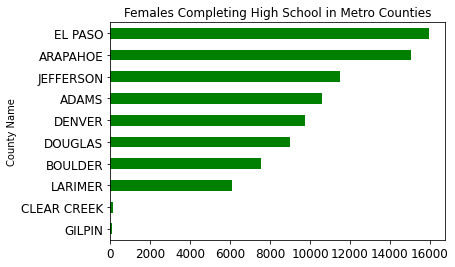

In [11]:
#Females Completing High School by Metro Counties

cat_totals = Metro.groupby("County Name")["Female Completers Total"].sum().sort_values()
cat_totals
cat_totals.plot(kind="barh", fontsize=12, color = "green", title = 'Females Completing High School in Metro Counties')
            
#The top 5 counties where females completed high school were El Paso, Arapahoe, Jefferson, Adams, and Denver.

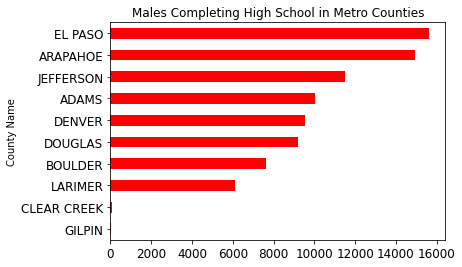

In [12]:
# Males Completing High School by Metro Counties

cat_totals2 = Metro.groupby("County Name")["Male Completers Total"].sum().sort_values()
cat_totals2
cat_totals2.plot(kind="barh", fontsize=12, color = "red", title = 'Males Completing High School in Metro Counties')

#The top 5 counties where females completed high school were El Paso, Arapahoe, Jefferson, Adams, and Denver.

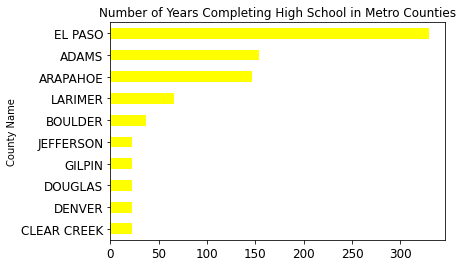

In [13]:
# Number of Years Completing High School by Metro Counties

years_total = Metro.groupby("County Name")["Number of Years After Entering High School"].sum().sort_values()
years_total
years_total.plot(kind="barh", fontsize=12, color = 'yellow', title = 'Number of Years Completing High School in Metro Counties')

# The top 5 counties for completing high school were El Paso, Adams, Arapahoe, Larimer, and Boulder.

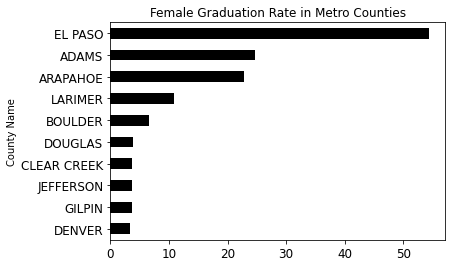

In [14]:
# Female Graduation Rate in Metro Counties

female_rate = Metro.groupby("County Name")["Female Graduation Rate"].sum().sort_values()
female_rate
female_rate.plot(kind="barh", fontsize=12, color = 'black', title = 'Female Graduation Rate in Metro Counties')

# The top five Metro counties with the best female graduation rate was El Paso, Adams, Arapahoe, Larimer, and Boulder.


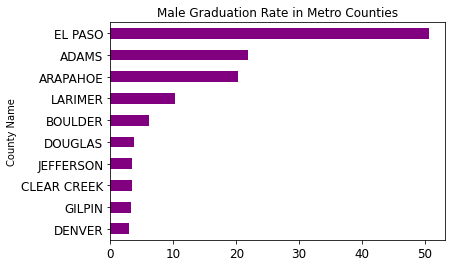

In [15]:
# Male Graduation Rate in Metro Counties

male_rate = Metro.groupby("County Name")["Male Graduation Rate"].sum().sort_values()
male_rate
male_rate.plot(kind="barh", fontsize=12, color = 'purple', title = 'Male Graduation Rate in Metro Counties')

# The top five Metro counties with the best male graduation rate was El Paso, Adams, Arapahoe, Larimer, and Boulder.

In [10]:
# Asian Male and Female Graduation Rate Data

asian_male = Metro.groupby("County Name")["Asian Male Graduation Rate"].sum().sort_values()
asian_male
asian_female = Metro.groupby("County Name")["Asian Female Graduation Rate"].sum().sort_values()
asian_female
Asian = pd.concat([asian_male, asian_female])
Asian
Asian.describe()

# Summary statistics of Asian data include count, mean, standard deviation, and quartile values. The code used to
# group data together was from an article written by Anirudh Nanduri titled "Different ways to create, subset,
# and combine data frames using pandas". Here is a link to the article: https://towardsdatascience.com/different-ways-
#to-create-subset-and-combine-dataframes-using-pandas-e7227330a7f1.


count    20.000000
mean     14.184735
std      16.562182
min       3.260111
25%       3.754764
50%       5.316056
75%      22.423199
max      56.683912
dtype: float64

In [11]:
# Outliers in Asian Data

def detect_outlier(Asian):
    q1, q3 = np.percentile(sorted(Asian), [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in Asian if x <= lower_bound or x >= upper_bound]
    return outliers
detect_outlier((Asian))

# The two outliers in this dataset were 56.7 and 56.4. The code referenced when determining the number of outliers was 
# from the One_Stop Data website from an article titled "Easy Outlier Detection in Python". Here is the link to the 
# website: https://onestopdataanalysis.com/python-outlier-detection/. 

[56.68391166113628, 56.385542262820245]

In [12]:
# Black Male and Female Graduation Rate Data

black_male = Metro.groupby("County Name")["Black or African American Male Graduation Rate"].sum().sort_values()
black_male
black_female = Metro.groupby("County Name")["Black or African American Female Graduation Rate"].sum().sort_values()
black_female
Black = pd.concat([black_male, black_female])
Black
Black.describe()

# Summary statistics of Black data include count, mean, standard deviation, and quartile values. The code used to
# group data together was from an article written by Anirudh Nanduri titled "Different ways to create, subset,
# and combine data frames using pandas". Here is a link to the article: https://towardsdatascience.com/different-ways-
#to-create-subset-and-combine-dataframes-using-pandas-e7227330a7f1.

count    20.000000
mean     12.597324
std      14.837051
min       2.794533
25%       3.256872
50%       4.794501
75%      19.992889
max      52.883885
dtype: float64

In [13]:
# Outliers in Black Data

def detect_outlier(Black):
    q1, q3 = np.percentile(sorted(Black), [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in Black if x <= lower_bound or x >= upper_bound]
    return outliers
detect_outlier((Black))

# The two outliers in this dataset were 48.0 and 52.9. The code referenced when determining the number of outliers was 
# from the One_Stop Data website from an article titled "Easy Outlier Detection in Python". Here is the link to the 
# website: https://onestopdataanalysis.com/python-outlier-detection/. 

[47.98003531657676, 52.88388514896225]

In [14]:
# Hispanic or Latino Male and Female Graduation Rate Data

hispanic_male = Metro.groupby("County Name")["Hispanic or Latino Male Graduation Rate"].sum().sort_values()
hispanic_male
hispanic_female = Metro.groupby("County Name")["Hispanic or Latino Female Graduation Rate"].sum().sort_values()
hispanic_female
Hispanic = pd.concat([hispanic_male, hispanic_female])
Hispanic
Hispanic.describe()

# The summary statistics include count, mean, standard deviation, and quartile values. The code used to
# group data together was from an article written by Anirudh Nanduri titled "Different ways to create, subset,
# and combine data frames using pandas". Here is a link to the article: https://towardsdatascience.com/different-ways-
#to-create-subset-and-combine-dataframes-using-pandas-e7227330a7f1.

count    20.000000
mean     12.676162
std      15.167935
min       2.806936
25%       3.249004
50%       4.569879
75%      19.471852
max      53.652117
dtype: float64

In [15]:
# Outliers in Hispanic Data

def detect_outlier(Hispanic):
    q1, q3 = np.percentile(sorted(Hispanic), [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in Hispanic if x <= lower_bound or x >= upper_bound]
    return outliers
detect_outlier((Hispanic))

# The two outliers for the Hispanic data were 49.4 and 53.7. The code referenced when determining the number of outliers was 
# from the One_Stop Data website from an article titled "Easy Outlier Detection in Python". Here is the link to the 
# website: https://onestopdataanalysis.com/python-outlier-detection/. 

[49.392027934742515, 53.652116643982254]

In [16]:
# White Male and Female Graduation Rate Data

white_male = Metro.groupby("County Name")["White Male Graduation Rate"].sum().sort_values()
white_male
white_female = Metro.groupby("County Name")["White Female Graduation Rate"].sum().sort_values()
white_female
White = pd.concat([white_male, white_female])
White
White.describe()

# The summary statistics include count, mean, standard devation, and quartile values. The code used to
# group data together was from an article written by Anirudh Nanduri titled "Different ways to create, subset,
# and combine data frames using pandas". Here is a link to the article: https://towardsdatascience.com/different-ways-
#to-create-subset-and-combine-dataframes-using-pandas-e7227330a7f1.

count    20.000000
mean     13.145105
std      15.342166
min       3.062193
25%       3.636975
50%       5.107761
75%      20.417588
max      54.383208
dtype: float64

In [17]:
# Outliers in White Data

def detect_outlier(White):
    q1, q3 = np.percentile(sorted(White), [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in White if x <= lower_bound or x >= upper_bound]
    return outliers
detect_outlier((White))

# The two outliers are 50.8 and 54.4. The code referenced when determining the number of outliers was 
# from the One_Stop Data website from an article titled "Easy Outlier Detection in Python". Here is the link to the 
# website: https://onestopdataanalysis.com/python-outlier-detection/. 

[50.84468024767501, 54.38320779486899]

In [18]:
# Other Male and Female Graduation Rate Data

native_male = Metro.groupby("County Name")["American Indian or Alaska Native Male Graduation Rate"].sum().sort_values()
native_male
native_female = Metro.groupby("County Name")["American Indian or Alaska Native Female Graduation Rate"].sum().sort_values()
native_female
hawaiian_male = Metro.groupby("County Name")["Native Hawaiian or Other Pacific Islander Male Graduation Rate"].sum().sort_values()
hawaiian_male
hawaiian_female = Metro.groupby("County Name")["Native Hawaiian or Other Pacific Islander Female Graduation Rate"].sum().sort_values()
hawaiian_female
Other = pd.concat([native_male, native_female, hawaiian_male, hawaiian_female])
Other
Other.describe()

# The summary statistics include count, mean, standard deviation, and quartile values. The code used to
# group data together was from an article written by Anirudh Nanduri titled "Different ways to create, subset,
# and combine data frames using pandas". Here is a link to the article: https://towardsdatascience.com/different-ways-
#to-create-subset-and-combine-dataframes-using-pandas-e7227330a7f1.

count    40.000000
mean     12.264000
std      14.304432
min       1.755141
25%       3.195975
50%       4.373810
75%      19.394929
max      52.122096
dtype: float64

In [19]:
# Outliers in Other Data

def detect_outlier(Other):
    q1, q3 = np.percentile(sorted(Other), [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in Other if x <= lower_bound or x >= upper_bound]
    return outliers
detect_outlier((Other))

# The four outliers for the Other data are 45.8, 48.7, 49.5, and 52.1. The code referenced when determining the number of outliers was 
# from the One_Stop Data website from an article titled "Easy Outlier Detection in Python". Here is the link to the 
# website: https://onestopdataanalysis.com/python-outlier-detection/. 

[45.799071932886015, 48.72585655317494, 49.4861974937295, 52.12209621691395]

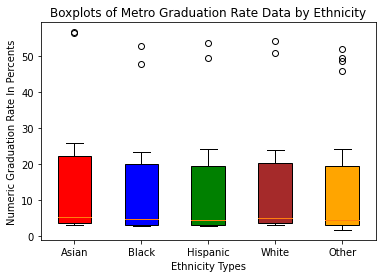

In [22]:
# Boxplots of Metro Graduation Rate Data by Ethnicity

Metro_boxplot_data = [Asian, Black, Hispanic, White, Other]
M = plt.boxplot(Metro_boxplot_data,patch_artist=True,labels=['Asian','Black','Hispanic','White', 'Other'])
colors = ['red', 'blue', 'green', 'brown', 'orange']
for patch, color in zip(M['boxes'], colors):
    patch.set_facecolor(color)
plt.title("Boxplots of Metro Graduation Rate Data by Ethnicity")  
plt.xlabel("Ethnicity Types")
plt.ylabel("Numeric Graduation Rate In Percents")

plt.show()

# There are five different boxplots based on ethnicity: Asian, Black, Hispanic, White, and Other. The Asian boxplot 
#showed two outliers, the Black boxplot had two outliers, the Hispanic boxplot had two outliers, the White boxplot had
#two outliers, and the Other boxplot had four outliers. The code I referenced to determine making boxplots was from 
# DataScience Made Simple website in an article titled "BOX PLOT IN PYTHON WITH MATPLOTLIB". Here is a link to the 
# website: https://www.datasciencemadesimple.com/box-plot-in-
#python/:~:text=boxplot%28%29%20function%20takes%20the%20data%20array%20to
#%20be,plotted.%20Create%20box%20plot%20in%20python%20with%20notch.


In [8]:
# Recategorizing County Name in Metro Data with Numeric Values

Metro['County Name'] = Metro['County Name'].astype('category').cat.codes
Metro

# County Names were renamed 0-9.

,County Name,Organization Code,Organization Name,"""Class Of..."" Anticpated Year of Graduation Cohort",Number of Years After Entering High School,All Students Final Grad Base,All Students Graduates Total,All Students Graduation Rate,All Students Completers Total,All Students Completion Rate,...,Two or More Races Female Final Grad Base,Two or More Races Female Graduates,Two or More Races Female Graduation Rate,Two or More Races Female Completers Total,Two or More Races Female Completion Rate,Two or More Races Male Final Grad Base,Two or More Races Male Graduates,Two or More Races Male Graduation Rate,Two or More Races Male Completers Total,Two or More Races Male Completion Rate
6,0,10.0,Mapleton 1,2019-2020,4.0,800.0,626.0,0.782500,640.0,0.800000,...,25.0,23.0,0.920000,25.0,1.000000,16.0,12.0,0.750000,12.0,0.750000
7,0,10.0,Mapleton 1,2018-2019,5.0,698.0,545.0,0.780802,580.0,0.830946,...,17.0,13.0,0.764706,14.0,0.823529,20.0,16.0,0.800000,16.0,0.800000
8,0,10.0,Mapleton 1,2017-2018,6.0,705.0,509.0,0.721986,552.0,0.782979,...,13.0,10.0,0.769231,11.0,0.846154,13.0,8.0,0.615385,9.0,0.692308
9,0,10.0,Mapleton 1,2016-2017,7.0,678.0,473.0,0.697640,521.0,0.768437,...,16.0,10.0,0.625000,10.0,0.625000,15.0,11.0,0.733333,13.0,0.866667
10,0,20.0,Adams 12 Five Star Schools,2019-2020,4.0,3044.0,2556.0,0.839685,2575.0,0.845926,...,21.0,18.0,0.857143,18.0,0.857143,17.0,13.0,0.764706,13.0,0.764706
11,0,20.0,Adams 12 Five Star Schools,2018-2019,5.0,2926.0,2581.0,0.882092,2597.0,0.887560,...,25.0,23.0,0.920000,23.0,0.920000,24.0,19.0,0.791667,19.0,0.791667
12,0,20.0,Adams 12 Five Star Schools,2017-2018,6.0,2791.0,2497.0,0.894661,2517.0,0.901827,...,25.0,24.0,0.960000,24.0,0.960000,19.0,17.0,0.894737,18.0,0.947368
13,0,20.0,Adams 12 Five Star Schools,2016-2017,7.0,2707.0,2446.0,0.903583,2465.0,0.910602,...,22.0,18.0,0.818182,18.0,0.818182,11.0,8.0,0.727273,8.0,0.727273
14,0,30.0,Adams County 14,2019-2020,4.0,533.0,356.0,0.667917,373.0,0.699812,...,3.0,2.0,0.666667,2.0,0.666667,3.0,2.0,0.666667,2.0,0.666667
15,0,30.0,Adams County 14,2018-2019,5.0,542.0,368.0,0.678967,388.0,0.715867,...,5.0,4.0,0.800000,4.0,0.800000,1.0,1.0,1.000000,1.0,1.000000


In [13]:
# Graduation Rates by Ethnicity and Female of Metro Data to make a new dataset called Metro_Female.

Metro_Female = Metro[["Asian Female Graduation Rate", "Black or African American Female Graduation Rate", "Hispanic or Latino Female Graduation Rate", "White Female Graduation Rate"]]
Metro_Female

# Ethnicities include Asian, Black or African American, Hispanic or Latino, and White.


,Asian Female Graduation Rate,Black or African American Female Graduation Rate,Hispanic or Latino Female Graduation Rate,White Female Graduation Rate
6,0.750000,0.818182,0.879070,0.786207
7,0.833333,0.500000,0.860465,0.750000
8,0.571429,0.615385,0.839080,0.742138
9,0.000000,0.750000,0.808917,0.716129
10,0.946237,0.964286,0.824841,0.932927
11,0.927536,0.888889,0.878049,0.951009
12,0.984375,0.861111,0.887348,0.949102
13,1.000000,0.891892,0.917603,0.952024
14,1.000000,0.750000,0.779736,0.705882
15,1.000000,0.600000,0.801802,0.793103


In [14]:
# Graduation Rate by Ethnicity and Male Gender of Metro Data to create a new dataset called Metro_Male.

Metro_Male = Metro[["Asian Male Graduation Rate","Black or African American Male Graduation Rate","Hispanic or Latino Male Graduation Rate","White Male Graduation Rate"]]
Metro_Male

# Ethnicities include American Indian or Alaskan Native, Asian, Black or African American, Hispanic or Latino, White,
# and Native Hawaiian or Other Pacific Islander.

,Asian Male Graduation Rate,Black or African American Male Graduation Rate,Hispanic or Latino Male Graduation Rate,White Male Graduation Rate
6,0.777778,0.600000,0.697778,0.753731
7,0.833333,0.800000,0.793814,0.707692
8,1.000000,0.785714,0.705128,0.582192
9,1.000000,0.714286,0.732558,0.511811
10,0.907216,0.750000,0.716332,0.865513
11,0.912500,0.827586,0.783617,0.903683
12,0.933333,0.868421,0.812613,0.899857
13,0.900000,0.764706,0.819231,0.914408
14,0.908986,0.500000,0.614407,0.272727
15,0.908986,0.250000,0.570213,0.593750


In [15]:
# Prediction of Metro data by looking at the County Name Variable

prediction_col = Metro['County Name']
prediction_col

# Predictions for prediction_col2 range from 0-17.

6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
42     1
43     1
      ..
248    6
249    6
250    6
251    6
252    6
253    6
254    6
255    6
256    6
257    6
282    7
283    7
284    7
285    7
314    8
315    8
316    8
317    8
362    9
363    9
364    9
365    9
366    9
367    9
368    9
369    9
370    9
371    9
372    9
373    9
Name: County Name, Length: 154, dtype: int8

In [16]:
# Prediction and Female Columns for Metro Female ANN

x=Metro_Female.values
y=prediction_col.values


# Dataset is split into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)

# Dataset is split into a 70:30 ratio.


In [17]:
# Data is scaled using StandardScaler

sc = StandardScaler()  


# Training and Testing data is created

x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)  

In [27]:
# Algorithm Created using Training Data

from sklearn.neural_network import MLPClassifier  

mlp = MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=3000)  
mlp.fit(x_train, y_train) 

# MLP has hidden layer sizes of 20,20, and 20, along with a max iteration of 3,000

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=3000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [28]:
# Predictions are created for Metro Female ANN Model

predictions = mlp.predict(x_test)
print(predictions)

# Predictions printed based on x_test data

[1 1 0 6 5 0 6 6 6 1 0 6 6 6 0 6 6 6 6 6 6 9 6 2 1 2 2 0 6 0 7 0 0 9 6 3 6
 6 6 6 1 1 5 4 6 9 0]


In [29]:
# Evaluation of Metro Female ANN Model

from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions)) 

# Results show that there is an accuracy rate of 48% and an f1 rate of 48% for female graduation rate based on 
#ethnicity and female graduation rate in Metro counties. The best results occurred in county 4, which is Denver County.
# The ANN code referenced was in "Week 5 - Artificial Neural Network (ANN)" from Regis University. Here is a link
# reference from the code: http://localhost:8888/notebooks/Downloads/FTE_Week5(2).ipynb.

[[ 2  1  1  0  0  1  4  0  0  1]
 [ 0  3  0  0  0  1  1  0  0  0]
 [ 0  0  1  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  1  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0]
 [ 2  1  0  1  0  0 15  1  0  0]
 [ 1  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  1]]
              precision    recall  f1-score   support

           0       0.22      0.20      0.21        10
           1       0.50      0.60      0.55         5
           2       0.33      0.50      0.40         2
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         1
           6       0.71      0.75      0.73        20
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.33      0.20      0.25         5

   micro avg       0.49      0.49      0.49        47
   macro avg       

/Users/benjaminreimer/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/benjaminreimer/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/benjaminreimer/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [34]:

# Decision Tree for Female Gradution Rate by Metro Counties

clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# The Accuracy rate for the decision tree is 45%. The code referenced to make the decision tree was from Sonia Motwani's
# article titled "Decision Tree Implementation in Python with Example". Here is a link to the website:
#  https://in.springboard.com/blog/decision-tree-implementation-in-python/. 

Accuracy: 0.44680851063829785


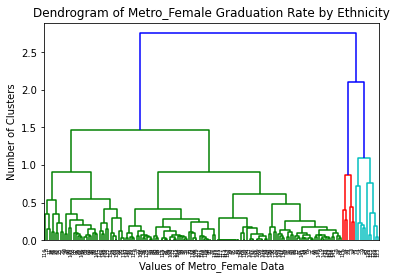

In [33]:
# Dendrogram of Metro_Female data

MF = Metro_Female.values
import scipy.cluster.hierarchy as sch
dendro = sch.dendrogram(sch.linkage(MF, method = 'ward'))
plt.title('Dendrogram of Metro_Female Graduation Rate by Ethnicity')
plt.xlabel('Values of Metro_Female Data')
plt.ylabel('Number of Clusters')

plt.show()

# Dendrogram shows that there would be a maximum of 3 clusters.

In [68]:
# Agglomerative Clustering looking at the Metro_Female Data

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(Metro_Female)
print(y_hc)

# Predictions for number of clusters for Metro_Female are created from 0-2.

[0 1 2 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 2 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


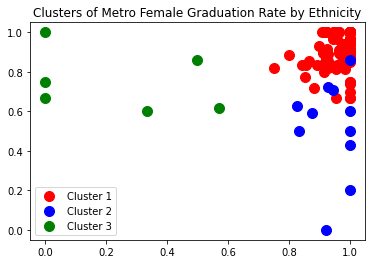

In [69]:
# Visualizing MF Clusters

plt.scatter(MF[y_hc == 0, 0], MF[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(MF[y_hc == 1, 0], MF[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(MF[y_hc == 2, 0], MF[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of Metro Female Graduation Rate by Ethnicity')
plt.legend()
plt.show()

# Three clusters of Metro Female Graduation Rate by Ethnicity are created. The code referenced for the three boxes of code
# above was from
# MLTut.com in an article titled "Hierarchical Clustering in Python, Step by Step Complete Guide". Here is a link
# to the article: https://www.mltut.com/hierarchical-clustering-in-python-
#step-by-step-complete guide/:~:text=The%20final%20cluster%20in%20the%20Hierarchical%20cluster%20co
#mbines,gained%20brief%20knowledge%20about%20Clustering%20and%20its%20types.


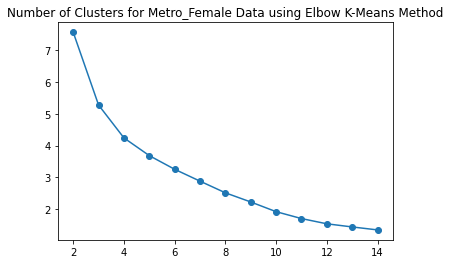

In [26]:
# Using Elbow Method to determine optimal number of clusters for Metro_Female Data

clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias = []

for c in clusters_range:
    kmeans = KMeans(init = 'k-means++', n_clusters=c, n_init=100, random_state=0).fit(Metro_Female)
    inertias.append(kmeans.inertia_)
    
plt.figure()
plt.plot(clusters_range, inertias, marker='o')
plt.title('Number of Clusters for Metro_Female Data using Elbow K-Means Method')
plt.show()

# The optimal number of clusters appears to be 3. The code referenced was from 
# an Analytics Vidhya article titled "A Detailed Introduction to K-Means Clustering in Python!" Here is a link to the
# referenced code: https://www.analyticsvidhya.com/blog/2020/12/a-detailed-introduction-to-k-means-clustering-in-python/.

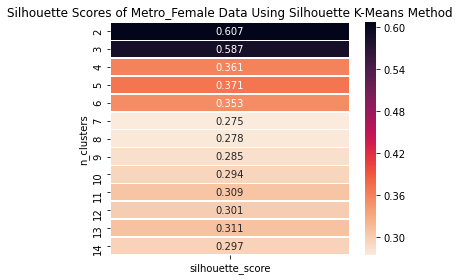

In [11]:
# Clusters using Silhouette Method for K-Means in Female_Metro Data

from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range = range(2,15)
results = []

for c in clusters_range:
    clusterer = KMeans(init='k-means++', n_clusters = c, n_init=100, random_state=0)
    cluster_labels = clusterer.fit_predict(Metro_Female)
    silhouette_avg = silhouette_score(Metro_Female, cluster_labels)
    results.append([c,silhouette_avg])
    
    
result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

plt.title('Silhouette Scores of Metro_Female Data Using Silhouette K-Means Method')

plt.figure
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

# Results show that the optimal number of clusters is 2 with a silhouette score of 0.607. The code referenced was from 
# an Analytics Vidhya article titled "A Detailed Introduction to K-Means Clustering in Python!" Here is a link to the
# referenced code: https://www.analyticsvidhya.com/blog/2020/12/a-detailed-introduction-to-k-means-clustering-in-python/.

In [35]:
# Prediction and Male Columns for Metro Male ANN

x2=Metro_Male.values
y2=prediction_col.values

# Training and Testing Variables for Male ANN

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.3, random_state=50)

# Dataset is split into 70:30 ratio.

In [36]:
# Data is scaled using StandardScaler

sc2 = StandardScaler()  


# Training and Testing data is created
x_train2 = sc2.fit_transform(x_train2)  
x_test2 = sc2.transform(x_test2)

In [37]:
# Algorithm Created using Training Data

from sklearn.neural_network import MLPClassifier  

mlp2 = MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=3000)  
mlp2.fit(x_train2, y_train2) 

# MLP Classifier has hidden layer sizes of 20, 20, and 20, along with a max iteration of 3,000.

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=3000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [38]:
# Predictions created for Male ANN

predictions2 = mlp2.predict(x_test2)
print(predictions2)

# Predictions based on county numbers 0-9.

[6 5 8 6 1 6 6 6 6 6 1 3 1 9 9 6 6 6 6 1 2 3 9 1 1 6 6 9 5 0 1 1 6 0 6 9 0
 0 6 5 4 6 0 4 1 9 1]


In [39]:
# Results of Male ANN Model

from sklearn.metrics import classification_report, confusion_matrix  

# Confusion Matrix of Male ANN Model
print(confusion_matrix(y_test2,predictions2))  
print(classification_report(y_test2,predictions2)) 

# Results show that there is an accuracy rate of 50% and an f1 rate of 45% for male graduation rate based on 
#ethnicity and male graduation rate in Metro counties. The best accuracy rate was in county 2, which is Boulder County.
# The ANN code referenced was in "Week 5 - Artificial Neural Network (ANN)" from Regis University. Here is a link
# reference from the code: http://localhost:8888/notebooks/Downloads/FTE_Week5(2).ipynb.

[[3 2 0 1 0 0 3 0 1 0]
 [0 3 0 0 0 0 2 0 0 0]
 [0 0 1 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [1 3 0 1 1 2 9 0 0 3]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 1 0 0 3]]
              precision    recall  f1-score   support

           0       0.60      0.30      0.40        10
           1       0.30      0.60      0.40         5
           2       1.00      0.50      0.67         2
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         1
           5       0.33      1.00      0.50         1
           6       0.53      0.45      0.49        20
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.50      0.60      0.55         5

   micro avg       0.45      0.45      0.45        47
   macro avg       0.38      0.45      0.37        47
weighted avg       0.50      0.45      0.45        47



/Users/benjaminreimer/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/benjaminreimer/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/benjaminreimer/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [42]:
# Decision Tree for Male Gradution Rate by Metro Counties

clf2 = DecisionTreeClassifier()
clf2 = clf2.fit(x_train2,y_train2)
y_pred2 = clf2.predict(x_test2)
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

# The Accuracy rate for the decision tree is 34%. The code referenced to make the decision tree was from Sonia Motwani's
# article titled "Decision Tree Implementation in Python with Example". Here is a link to the website:
#  https://in.springboard.com/blog/decision-tree-implementation-in-python/.

Accuracy: 0.3404255319148936


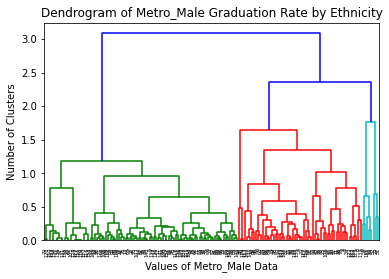

In [35]:
# Dendrogram of Metro_Male data

MM = Metro_Male.values
import scipy.cluster.hierarchy as sch
dendro = sch.dendrogram(sch.linkage(MM, method = 'ward'))
plt.title('Dendrogram of Metro_Male Graduation Rate by Ethnicity')
plt.xlabel('Values of Metro_Male Data')
plt.ylabel('Number of Clusters')

plt.show()

# Dendrogram shows that there would be a maximum of 2 clusters.

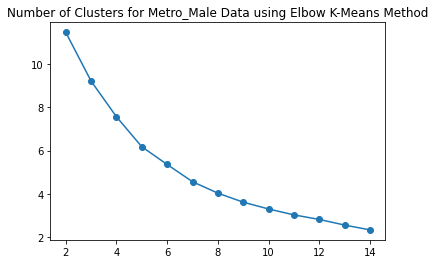

In [37]:
# Using Elbow Method to determine optimal number of clusters for Metro_Male Data

clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias = []

for c in clusters_range:
    kmeans = KMeans(init = 'k-means++', n_clusters=c, n_init=100, random_state=0).fit(Metro_Male)
    inertias.append(kmeans.inertia_)


    
plt.figure()
plt.plot(clusters_range, inertias, marker='o')
plt.title('Number of Clusters for Metro_Male Data using Elbow K-Means Method')
plt.show()

# The optimal number of clusters appears to be 2. The code referenced was from 
# an Analytics Vidhya article titled "A Detailed Introduction to K-Means Clustering in Python!" Here is a link to the
# referenced code: https://www.analyticsvidhya.com/blog/2020/12/a-detailed-introduction-to-k-means-clustering-in-python/.

In [106]:
# Agglomerative Clustering looking at the Metro_Male Data

from sklearn.cluster import AgglomerativeClustering
hc2 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc2 = hc2.fit_predict(Metro_Male)
print(y_hc2)

# Predictions for number of clusters for Metro_Male are created from 0-1.

[0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1
 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0
 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0
 1 1 1 1 1 1]


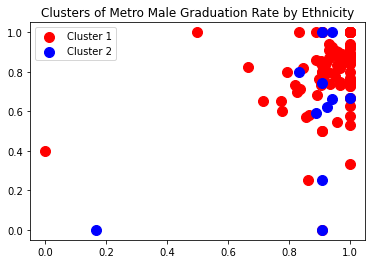

In [107]:
# Visualizing MM Clusters

plt.scatter(MM[y_hc == 0, 0], MM[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(MM[y_hc == 1, 0], MM[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('Clusters of Metro Male Graduation Rate by Ethnicity')
plt.legend()
plt.show()

# Three clusters of Metro Male Graduation Rate by Ethnicity are created. The code referenced for the three lines
# of code above was from
# MLTut.com in an article titled "Hierarchical Clustering in Python, Step by Step Complete Guide". Here is a link
# to the article: https://www.mltut.com/hierarchical-clustering-in-python-
#step-by-step-complete guide/:~:text=The%20final%20cluster%20in%20the%20Hierarchical%20cluster%20co
#mbines,gained%20brief%20knowledge%20about%20Clustering%20and%20its%20types.

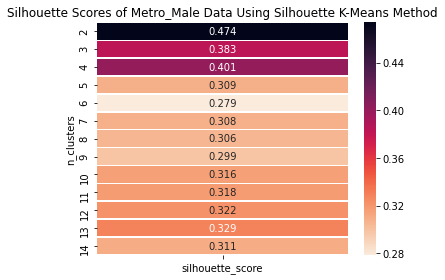

In [12]:
# Clusters using Silhouette Method for K-Means in Male_Metro Data

from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range = range(2,15)
results = []

for c in clusters_range:
    clusterer = KMeans(init='k-means++', n_clusters = c, n_init=100, random_state=0)
    cluster_labels = clusterer.fit_predict(Metro_Male)
    silhouette_avg = silhouette_score(Metro_Male, cluster_labels)
    results.append([c,silhouette_avg])
    
    
result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

plt.title('Silhouette Scores of Metro_Male Data Using Silhouette K-Means Method')

plt.figure
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

# Results show that the optimal number of clusters is 2 with a silhouette score of 0.474. The code referenced was from 
# an Analytics Vidhya article titled "A Detailed Introduction to K-Means Clustering in Python!" Here is a link to the
# referenced code: https://www.analyticsvidhya.com/blog/2020/12/a-detailed-introduction-to-k-means-clustering-in-python/.

In [39]:
# Western Slope/Mountain Data

W1 = df2.iloc[110:118]
W2 = df2.iloc[158:162]
W3 = df2.iloc[174:178]
W4 = df2.iloc[270:282]
W5 = df2.iloc[286:294]
W6 = df2.iloc[294:298]
W7 = df2.iloc[310:314]
W8 = df2.iloc[346:350]
W9 = df2.iloc[426:438]
W10 = df2.iloc[442:446]
W11 = df2.iloc[458:466]
W12 = df2.iloc[506:514]
W13 = df2.iloc[514:522]
W14 = df2.iloc[530:534]
W15 = df2.iloc[558:566]
W16 = df2.iloc[578:590]
W17 = df2.iloc[622:626]


Western = pd.concat([W1,W2, W3, W4, W5, W6, W7, W8, W9, W10, W11, W12, W13, W14, W15, W16, W17])
Western

# The Western data contained 17 different counties.

,County Name,Organization Code,Organization Name,"""Class Of..."" Anticpated Year of Graduation Cohort",Number of Years After Entering High School,All Students Final Grad Base,All Students Graduates Total,All Students Graduation Rate,All Students Completers Total,All Students Completion Rate,...,Two or More Races Female Final Grad Base,Two or More Races Female Graduates,Two or More Races Female Graduation Rate,Two or More Races Female Completers Total,Two or More Races Female Completion Rate,Two or More Races Male Final Grad Base,Two or More Races Male Graduates,Two or More Races Male Graduation Rate,Two or More Races Male Completers Total,Two or More Races Male Completion Rate
110,CHAFFEE,490.0,Buena Vista R-31,2019-2020,4.0,71.0,54.0,0.760563,56.0,0.788732,...,0.0,0.0,0.883445,0.0,0.908620,0.0,0.0,0.818130,0.0,0.856530
111,CHAFFEE,490.0,Buena Vista R-31,2018-2019,5.0,85.0,74.0,0.870588,76.0,0.894118,...,2.0,2.0,1.000000,2.0,1.000000,3.0,1.0,0.333333,1.0,0.333333
112,CHAFFEE,490.0,Buena Vista R-31,2017-2018,6.0,71.0,63.0,0.887324,65.0,0.915493,...,1.0,1.0,1.000000,1.0,1.000000,0.0,0.0,0.818130,0.0,0.856530
113,CHAFFEE,490.0,Buena Vista R-31,2016-2017,7.0,72.0,66.0,0.916667,67.0,0.930556,...,0.0,0.0,0.883445,0.0,0.908620,0.0,0.0,0.818130,0.0,0.856530
114,CHAFFEE,500.0,Salida R-32,2019-2020,4.0,94.0,83.0,0.882979,83.0,0.882979,...,2.0,2.0,1.000000,2.0,1.000000,1.0,1.0,1.000000,1.0,1.000000
115,CHAFFEE,500.0,Salida R-32,2018-2019,5.0,111.0,100.0,0.900901,104.0,0.936937,...,2.0,1.0,0.500000,2.0,1.000000,1.0,0.0,0.000000,0.0,0.000000
116,CHAFFEE,500.0,Salida R-32,2017-2018,6.0,93.0,81.0,0.870968,88.0,0.946237,...,2.0,2.0,1.000000,2.0,1.000000,2.0,1.0,0.500000,1.0,0.500000
117,CHAFFEE,500.0,Salida R-32,2016-2017,7.0,96.0,76.0,0.791667,83.0,0.864583,...,2.0,2.0,1.000000,2.0,1.000000,0.0,0.0,0.818130,0.0,0.856530
158,DELTA,870.0,Delta County 50(J),2019-2020,4.0,336.0,279.0,0.830357,281.0,0.836310,...,4.0,4.0,1.000000,4.0,1.000000,7.0,4.0,0.571429,4.0,0.571429
159,DELTA,870.0,Delta County 50(J),2018-2019,5.0,354.0,317.0,0.895480,318.0,0.898305,...,8.0,7.0,0.875000,7.0,0.875000,6.0,6.0,1.000000,6.0,1.000000


In [110]:
# Summary Statistics for Western Data

Western.describe()

# The summary statistics for Western data include count, mean, standard deviaition, and quartile values.

,Organization Code,Number of Years After Entering High School,All Students Final Grad Base,All Students Graduates Total,All Students Graduation Rate,All Students Completers Total,All Students Completion Rate,Female Final Grad Base,Female Graduates Total,Female Graduation Rate,...,Two or More Races Female Final Grad Base,Two or More Races Female Graduates,Two or More Races Female Graduation Rate,Two or More Races Female Completers Total,Two or More Races Female Completion Rate,Two or More Races Male Final Grad Base,Two or More Races Male Graduates,Two or More Races Male Graduation Rate,Two or More Races Male Completers Total,Two or More Races Male Completion Rate
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,...,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,1912.241379,5.500000,188.784483,163.172414,0.889367,166.534483,0.913349,90.405172,81.612069,0.916572,...,2.362069,2.103448,0.897347,2.155172,0.932145,2.482759,2.077586,0.826994,2.120690,0.859607
std,751.889893,1.122884,307.682298,260.866625,0.104322,263.764764,0.079311,150.966623,133.617024,0.091870,...,5.809133,5.128572,0.147870,5.164433,0.092177,5.727861,4.617831,0.201207,4.711051,0.182501
min,490.000000,4.000000,4.000000,4.000000,0.320312,4.000000,0.507812,0.000000,0.000000,0.470588,...,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1340.000000,4.750000,27.000000,25.750000,0.866531,25.750000,0.880326,13.000000,13.000000,0.888889,...,0.000000,0.000000,0.883445,0.000000,0.908620,0.000000,0.000000,0.818130,0.000000,0.856530
50%,2000.000000,5.500000,86.000000,68.500000,0.900000,74.500000,0.925926,36.500000,32.000000,0.927606,...,1.000000,1.000000,0.883445,1.000000,0.908620,0.000000,0.000000,0.818130,0.000000,0.856530
75%,2610.000000,6.250000,202.500000,191.000000,0.948622,195.500000,0.970507,105.250000,100.000000,0.985609,...,2.000000,2.000000,1.000000,2.000000,1.000000,3.000000,3.000000,1.000000,3.000000,1.000000
max,3000.000000,7.000000,1646.000000,1423.000000,1.000000,1445.000000,1.000000,804.000000,722.000000,1.000000,...,38.000000,33.000000,1.000000,33.000000,1.000000,35.000000,29.000000,1.000000,29.000000,1.000000


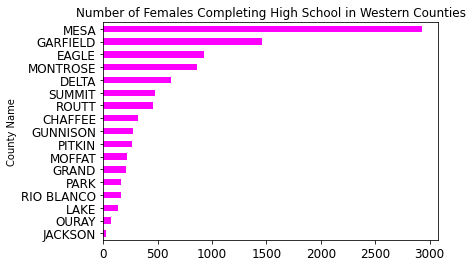

In [111]:
#Females Completing High School by Western Counties

west_totals = Western.groupby("County Name")["Female Completers Total"].sum().sort_values()
west_totals
west_totals.plot(kind="barh", fontsize=12, color = 'magenta', title = 'Number of Females Completing High School in Western Counties')

# The top 5 number of counties where females completed high school were Mesa, Garfield, Eagle, Montrose, and Delta.

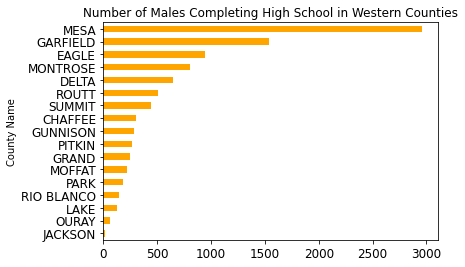

In [112]:
# Males Completing High School by Western Counties

west2_totals = Western.groupby("County Name")["Male Completers Total"].sum().sort_values()
west2_totals
west2_totals.plot(kind="barh", fontsize=12, color = 'orange', title = 'Number of Males Completing High School in Western Counties')

# The top 5 number of counties where males completed high school were Mesa, Garfield, Eagle, Montrose, and Delta.

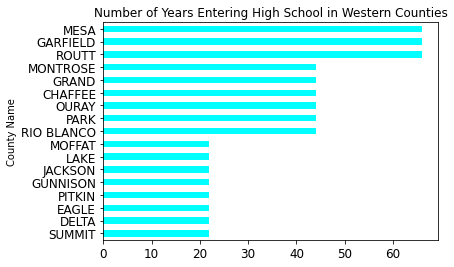

In [113]:
# Number of Years After High School by Western Counties

west_years = Western.groupby("County Name")["Number of Years After Entering High School"].sum().sort_values()
west_years
west_years.plot(kind="barh", fontsize=12, color = 'cyan', title = 'Number of Years Entering High School in Western Counties')

# The top 5 number of counties where students completed high school in a number of years were Mesa, Garfield, Routt,
#Montrose, and Grand.

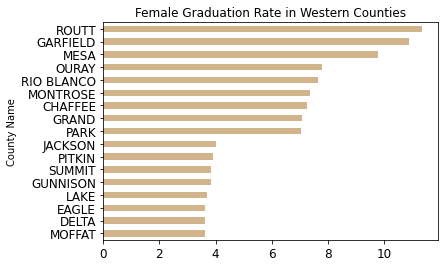

In [114]:
# Female Graduation Rate in Metro Counties

female_west = Western.groupby("County Name")["Female Graduation Rate"].sum().sort_values()
female_west
female_west.plot(kind="barh", fontsize=12, color = 'tan', title = 'Female Graduation Rate in Western Counties')

# The top five Western counties with the best female graduation rate was Routt, Garfield, Mesa, Ouray, and Rio Blanco.

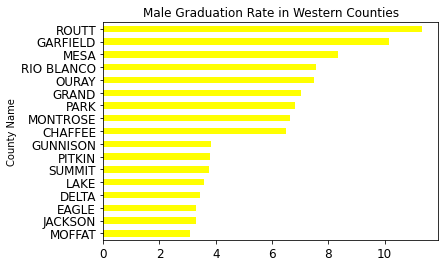

In [115]:
# Female Graduation Rate in Metro Counties

male_west = Western.groupby("County Name")["Male Graduation Rate"].sum().sort_values()
male_west
male_west.plot(kind="barh", fontsize=12, color = 'yellow', title = 'Male Graduation Rate in Western Counties')

# The top five Western counties with the best male graduation rate was Routt, Garfield, Mesa, Rio Blanco, and Ouray.

In [40]:
# Asian Male and Female Graduation Rate by Western Counties

asian2_male = Western.groupby("County Name")["Asian Male Graduation Rate"].sum().sort_values()
asian2_male
asian2_female = Western.groupby("County Name")["Asian Female Graduation Rate"].sum().sort_values()
asian2_female
Asian2 = pd.concat([asian2_male, asian2_female])
Asian2
Asian2.describe()

# Summary statistics of Asian2 data include count, mean, standard deviation, and quartile values. The code used to
# group data together was from an article written by Anirudh Nanduri titled "Different ways to create, subset,
# and combine data frames using pandas". Here is a link to the article: https://towardsdatascience.com/different-ways-
#to-create-subset-and-combine-dataframes-using-pandas-e7227330a7f1.

count    34.000000
mean      6.224319
std       2.719132
min       2.764033
25%       3.749713
50%       7.271891
75%       7.540715
max      11.453918
dtype: float64

In [41]:
# Outliers in Asian2 Data

def detect_outlier(Asian2):
    q1, q3 = np.percentile(sorted(Asian2), [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in Asian2 if x <= lower_bound or x >= upper_bound]
    return outliers
detect_outlier((Asian2))

# There are no outliers in Asian2 data. The code referenced when determining the number of outliers was 
# from the One_Stop Data website from an article titled "Easy Outlier Detection in Python". Here is the link to the 
# website: https://onestopdataanalysis.com/python-outlier-detection/. 

[]

In [42]:
# Black Male and Female Graduation Rate by Western Counties

black2_male = Western.groupby("County Name")["Black or African American Male Graduation Rate"].sum().sort_values()
black2_male
black2_female = Western.groupby("County Name")["Black or African American Female Graduation Rate"].sum().sort_values()
black2_female
Black2 = pd.concat([black2_male, black2_female])
Black2
Black2.describe()

# Summary statistics of Black2 data include count, mean, standard deviation, and quartile values. The code used to
# group data together was from an article written by Anirudh Nanduri titled "Different ways to create, subset,
# and combine data frames using pandas". Here is a link to the article: https://towardsdatascience.com/different-ways-
#to-create-subset-and-combine-dataframes-using-pandas-e7227330a7f1.

count    34.000000
mean      5.465434
std       2.395598
min       2.235925
25%       3.455471
50%       5.717159
75%       6.865382
max      10.723555
dtype: float64

In [43]:
# Outliers in Black2 Data

def detect_outlier(Black2):
    q1, q3 = np.percentile(sorted(Black2), [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in Black2 if x <= lower_bound or x >= upper_bound]
    return outliers
detect_outlier((Black2))

# There are no outliers in Black2 dataset. The code referenced when determining the number of outliers was 
# from the One_Stop Data website from an article titled "Easy Outlier Detection in Python". Here is the link to the 
# website: https://onestopdataanalysis.com/python-outlier-detection/. 

[]

In [44]:
# Hispanic Male and Female Graduation Rate by Western Counties

hispanic2_male = Western.groupby("County Name")["Hispanic or Latino Male Graduation Rate"].sum().sort_values()
hispanic2_male
hispanic2_female = Western.groupby("County Name")["Hispanic or Latino Female Graduation Rate"].sum().sort_values()
hispanic2_female
Hispanic2 = pd.concat([hispanic2_male, hispanic2_female])
Hispanic2
Hispanic2.describe()

# Summary statistics of Hispanic2 data include count, mean, standard deviation, and quartile values. The code used to
# group data together was from an article written by Anirudh Nanduri titled "Different ways to create, subset,
# and combine data frames using pandas". Here is a link to the article: https://towardsdatascience.com/different-ways-
#to-create-subset-and-combine-dataframes-using-pandas-e7227330a7f1.

count    34.000000
mean      5.715353
std       2.547050
min       2.784121
25%       3.555736
50%       5.200892
75%       7.606944
max      10.959302
dtype: float64

In [45]:
# Outliers in Hispanic2 Data

def detect_outlier(Hispanic2):
    q1, q3 = np.percentile(sorted(Hispanic2), [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in Hispanic2 if x <= lower_bound or x >= upper_bound]
    return outliers
detect_outlier((Hispanic2))

# There are no outliers in Hispanic2 dataset. The code referenced when determining the number of outliers was 
# from the One_Stop Data website from an article titled "Easy Outlier Detection in Python". Here is the link to the 
# website: https://onestopdataanalysis.com/python-outlier-detection/. 

[]

In [46]:
# White Male and Female Graduation Rate Data

white2_male = Western.groupby("County Name")["White Male Graduation Rate"].sum().sort_values()
white2_male
white2_female = Western.groupby("County Name")["White Female Graduation Rate"].sum().sort_values()
white2_female
White2 = pd.concat([white2_male, white2_female])
White2
White2.describe()

# Summary statistics of White2 describe data include count, mean, standard deviaition, and quartile values. The code used to
# group data together was from an article written by Anirudh Nanduri titled "Different ways to create, subset,
# and combine data frames using pandas". Here is a link to the article: https://towardsdatascience.com/different-ways-
#to-create-subset-and-combine-dataframes-using-pandas-e7227330a7f1.

count    34.000000
mean      6.170958
std       2.661609
min       3.184581
25%       3.818142
50%       6.779706
75%       7.545536
max      11.515013
dtype: float64

In [47]:
# Outliers in White2 Data

def detect_outlier(White2):
    q1, q3 = np.percentile(sorted(White2), [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in White2 if x <= lower_bound or x >= upper_bound]
    return outliers
detect_outlier((White2))

# There are no outliers in White2 data. The code referenced when determining the number of outliers was 
# from the One_Stop Data website from an article titled "Easy Outlier Detection in Python". Here is the link to the 
# website: https://onestopdataanalysis.com/python-outlier-detection/. 

[]

In [48]:
# Other2 Male and Female Graduation Rate Data

native2_male = Western.groupby("County Name")["American Indian or Alaska Native Male Graduation Rate"].sum().sort_values()
native2_male
native2_female = Western.groupby("County Name")["American Indian or Alaska Native Female Graduation Rate"].sum().sort_values()
native2_female
hawaiian2_male = Western.groupby("County Name")["Native Hawaiian or Other Pacific Islander Male Graduation Rate"].sum().sort_values()
hawaiian2_male
hawaiian2_female = Western.groupby("County Name")["Native Hawaiian or Other Pacific Islander Female Graduation Rate"].sum().sort_values()
hawaiian2_female
Other2 = pd.concat([native2_male, native2_female, hawaiian2_male, hawaiian2_female])
Other2
Other2.describe()

# Summary statistics of Other2 data include count, mean, standard deviation, and quartile values. The code used to
# group data together was from an article written by Anirudh Nanduri titled "Different ways to create, subset,
# and combine data frames using pandas". Here is a link to the article: https://towardsdatascience.com/different-ways-
#to-create-subset-and-combine-dataframes-using-pandas-e7227330a7f1.

count    68.000000
mean      5.414493
std       2.342434
min       2.603921
25%       3.207841
50%       5.984007
75%       6.905722
max      10.632153
dtype: float64

In [49]:
# Outliers in Other2 Data

def detect_outlier(Other2):
    q1, q3 = np.percentile(sorted(Other2), [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in Other2 if x <= lower_bound or x >= upper_bound]
    return outliers
detect_outlier((Other2))

# There are no outliers in Other2 data. The code referenced when determining the number of outliers was 
# from the One_Stop Data website from an article titled "Easy Outlier Detection in Python". Here is the link to the 
# website: https://onestopdataanalysis.com/python-outlier-detection/. 

[]

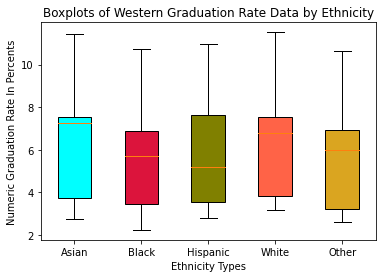

In [50]:
# Boxplots of Metro Graduation Rate Data by Ethinicity

Western_boxplot_data = [Asian2, Black2, Hispanic2, White2, Other2]
W = plt.boxplot(Western_boxplot_data,patch_artist=True,labels=['Asian','Black','Hispanic','White', 'Other'])
colors = ['cyan', 'crimson', 'olive', 'tomato', 'goldenrod']
for patch, color in zip (W['boxes'], colors):
    patch.set_facecolor(color)

plt.title("Boxplots of Western Graduation Rate Data by Ethnicity")  
plt.xlabel("Ethnicity Types")
plt.ylabel("Numeric Graduation Rate In Percents")    

plt.show()

# There are five different boxplots based on ethnicity: Asian, Black, Hispanic, White, and Other. The box plots show 
#that no outliers exist. The code I referenced to determine making boxplots was from 
# DataScience Made Simple website in an article titled "BOX PLOT IN PYTHON WITH MATPLOTLIB". Here is a link to the 
# website: https://www.datasciencemadesimple.com/box-plot-in-
#python/:~:text=boxplot%28%29%20function%20takes%20the%20data%20array%20to
#%20be,plotted.%20Create%20box%20plot%20in%20python%20with%20notch.

In [51]:
# Recategorizing County Name in Western Data with Numeric Values

Western['County Name'] = Western['County Name'].astype('category').cat.codes
Western

# County Names were renamed 0-16.

,County Name,Organization Code,Organization Name,"""Class Of..."" Anticpated Year of Graduation Cohort",Number of Years After Entering High School,All Students Final Grad Base,All Students Graduates Total,All Students Graduation Rate,All Students Completers Total,All Students Completion Rate,...,Two or More Races Female Final Grad Base,Two or More Races Female Graduates,Two or More Races Female Graduation Rate,Two or More Races Female Completers Total,Two or More Races Female Completion Rate,Two or More Races Male Final Grad Base,Two or More Races Male Graduates,Two or More Races Male Graduation Rate,Two or More Races Male Completers Total,Two or More Races Male Completion Rate
110,0,490.0,Buena Vista R-31,2019-2020,4.0,71.0,54.0,0.760563,56.0,0.788732,...,0.0,0.0,0.883445,0.0,0.908620,0.0,0.0,0.818130,0.0,0.856530
111,0,490.0,Buena Vista R-31,2018-2019,5.0,85.0,74.0,0.870588,76.0,0.894118,...,2.0,2.0,1.000000,2.0,1.000000,3.0,1.0,0.333333,1.0,0.333333
112,0,490.0,Buena Vista R-31,2017-2018,6.0,71.0,63.0,0.887324,65.0,0.915493,...,1.0,1.0,1.000000,1.0,1.000000,0.0,0.0,0.818130,0.0,0.856530
113,0,490.0,Buena Vista R-31,2016-2017,7.0,72.0,66.0,0.916667,67.0,0.930556,...,0.0,0.0,0.883445,0.0,0.908620,0.0,0.0,0.818130,0.0,0.856530
114,0,500.0,Salida R-32,2019-2020,4.0,94.0,83.0,0.882979,83.0,0.882979,...,2.0,2.0,1.000000,2.0,1.000000,1.0,1.0,1.000000,1.0,1.000000
115,0,500.0,Salida R-32,2018-2019,5.0,111.0,100.0,0.900901,104.0,0.936937,...,2.0,1.0,0.500000,2.0,1.000000,1.0,0.0,0.000000,0.0,0.000000
116,0,500.0,Salida R-32,2017-2018,6.0,93.0,81.0,0.870968,88.0,0.946237,...,2.0,2.0,1.000000,2.0,1.000000,2.0,1.0,0.500000,1.0,0.500000
117,0,500.0,Salida R-32,2016-2017,7.0,96.0,76.0,0.791667,83.0,0.864583,...,2.0,2.0,1.000000,2.0,1.000000,0.0,0.0,0.818130,0.0,0.856530
158,1,870.0,Delta County 50(J),2019-2020,4.0,336.0,279.0,0.830357,281.0,0.836310,...,4.0,4.0,1.000000,4.0,1.000000,7.0,4.0,0.571429,4.0,0.571429
159,1,870.0,Delta County 50(J),2018-2019,5.0,354.0,317.0,0.895480,318.0,0.898305,...,8.0,7.0,0.875000,7.0,0.875000,6.0,6.0,1.000000,6.0,1.000000


In [52]:
# Graduation Rates by Ethnicity and Female Grouped to make a new dataset called Western_Female.

Western_Female = Western[["Asian Female Graduation Rate", "Black or African American Female Graduation Rate", "Hispanic or Latino Female Graduation Rate", "White Female Graduation Rate"]]
Western_Female

# Ethnicities for Western_Female include American Indian or Alaska Native, Asian, Hispanic or Latino, White, and 
# Native Hawaiian or Other Pacific Islander.

,Asian Female Graduation Rate,Black or African American Female Graduation Rate,Hispanic or Latino Female Graduation Rate,White Female Graduation Rate
110,0.921344,0.858173,1.000000,0.864865
111,0.921344,0.858173,1.000000,0.947368
112,0.921344,0.858173,1.000000,0.833333
113,0.921344,0.858173,0.800000,0.967742
114,1.000000,0.858173,0.857143,0.933333
115,0.921344,0.858173,0.888889,0.960784
116,0.921344,0.858173,1.000000,0.928571
117,0.921344,0.858173,0.666667,0.852941
158,0.921344,0.858173,0.758621,0.858209
159,1.000000,1.000000,0.900000,0.954198


In [53]:
# Graduation Rates by Ethnicity and Male Grouped to make a new dataset called Western_Male.

Western_Male = Western[["Asian Male Graduation Rate", "Black or African American Male Graduation Rate", "Hispanic or Latino Male Graduation Rate", "White Male Graduation Rate"]]
Western_Male

# Ethnicities for Western_Male include American Indian or Alaska Native, Asian, Hispanic or Latino, White, and 
# Native Hawaiian or Other Pacific Islander.

,Asian Male Graduation Rate,Black or African American Male Graduation Rate,Hispanic or Latino Male Graduation Rate,White Male Graduation Rate
110,0.908986,0.000000,0.500000,0.678571
111,0.908986,0.745308,0.692308,0.880000
112,1.000000,0.745308,0.750000,0.928571
113,0.908986,1.000000,1.000000,0.878788
114,0.908986,0.745308,0.800000,0.854167
115,1.000000,0.745308,0.875000,0.864865
116,0.908986,0.745308,0.700000,0.866667
117,1.000000,0.745308,0.285714,0.826087
158,1.000000,0.745308,0.866667,0.812500
159,0.800000,0.745308,0.870968,0.837398


In [130]:
# Prediction of Western by looking at the County Name Variable

prediction_col2 = Western['County Name']
prediction_col2

# Predictions for prediction_col2 range from 0-17.

110     0
111     0
112     0
113     0
114     0
115     0
116     0
117     0
158     1
159     1
160     1
161     1
174     2
175     2
176     2
177     2
270     3
271     3
272     3
273     3
274     3
275     3
276     3
277     3
278     3
279     3
280     3
281     3
286     4
287     4
       ..
520    12
521    12
530    13
531    13
532    13
533    13
558    14
559    14
560    14
561    14
562    14
563    14
564    14
565    14
578    15
579    15
580    15
581    15
582    15
583    15
584    15
585    15
586    15
587    15
588    15
589    15
622    16
623    16
624    16
625    16
Name: County Name, Length: 116, dtype: int8

In [131]:
# Prediction and Female Columns for Western ANN

x3=Western_Female.values
y3=prediction_col2.values

# Training and Testing Variables for Western Female ANN

x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.3, random_state=50)

# Dataset is split into 70:30 ratio.

In [132]:
# Data is scaled using StandardScaler

sc3 = StandardScaler()  


# Training and Testing data is created

x_train3 = sc3.fit_transform(x_train3)  
x_test3 = sc3.transform(x_test3)  

In [139]:
# Algorithm Created using Training Data

from sklearn.neural_network import MLPClassifier  

mlp3 = MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=3000)  
mlp3.fit(x_train3, y_train3) 

# The Western_Female ANN had three hidden layers of size 20 and a max iteration of 3,000.

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=3000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [140]:
# Predictions are created for Western Female ANN Model

predictions_west = mlp3.predict(x_test3)
print(predictions_west)

# Predictions_west variable ranges from 0-16.

[ 5  0 14 10 13  8  3  3 13 12  0  3  5  0  2 14  3  4 10  8  8 15  0 16
  3 14  0  8  5  8  8  4  0  5  0]


In [141]:
# Evaluation of Western Female ANN Model

from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test3,predictions_west))  
print(classification_report(y_test3,predictions_west)) 

# Results show that there is an accuracy rate of 23% and an f1 rate of 15% for female graduation rate based on 
#ethnicity and female graduation rates in Western counties. The best rate occurred in county 16, which is Summit County.
# The ANN code referenced was in "Week 5 - Artificial Neural Network (ANN)" from Regis University. Here is a link
# reference from the code: http://localhost:8888/notebooks/Downloads/FTE_Week5(2).ipynb.

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0]
 [0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]
              precision    recall  f1-score   support

           0       0.14      1.00      0.25         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.40      0.40      0.40         5
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00  

/Users/benjaminreimer/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/benjaminreimer/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/benjaminreimer/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [142]:
# Decision Tree for Female Gradution Rate by Western Counties

clf3 = DecisionTreeClassifier()
clf3 = clf3.fit(x_train3,y_train3)
y_pred3 = clf3.predict(x_test3)
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

# The Accuracy rate for the decision tree is 14%. The code referenced to make the decision tree was from Sonia Motwani's
# article titled "Decision Tree Implementation in Python with Example". Here is a link to the website:
#  https://in.springboard.com/blog/decision-tree-implementation-in-python/. 

Accuracy: 0.14285714285714285


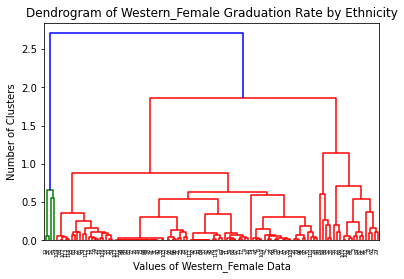

In [59]:
# Dendrogram of Western_Female data

WF = Western_Female.values
import scipy.cluster.hierarchy as sch
dendro = sch.dendrogram(sch.linkage(WF, method = 'ward'))
plt.title('Dendrogram of Western_Female Graduation Rate by Ethnicity')
plt.xlabel('Values of Western_Female Data')
plt.ylabel('Number of Clusters')

plt.show()


# Dendrogram shows that there would be a maximum of 2 clusters.

In [144]:
# Agglomerative Clustering looking at the Western_Female Data

from sklearn.cluster import AgglomerativeClustering
hc3 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc3 = hc3.fit_predict(Western_Female)
print(y_hc3)

# Predictions for number of clusters for Metro_Male are created from 0-1.

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]


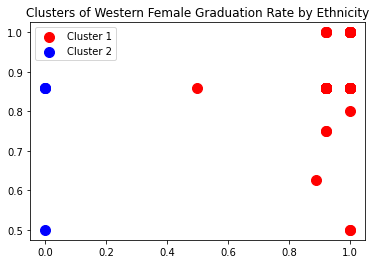

In [145]:
# Visualizing WF Clusters

plt.scatter(WF[y_hc3 == 0, 0], WF[y_hc3 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(WF[y_hc3 == 1, 0], WF[y_hc3 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('Clusters of Western Female Graduation Rate by Ethnicity')
plt.legend()
plt.show()

# Two clusters of Western Female Graduation Rate by Ethnicity are created. The code referenced for 
# the three lines of code above was from
# MLTut.com in an article titled "Hierarchical Clustering in Python, Step by Step Complete Guide". Here is a link
# to the article: https://www.mltut.com/hierarchical-clustering-in-python-
#step-by-step-complete guide/:~:text=The%20final%20cluster%20in%20the%20Hierarchical%20cluster%20co
#mbines,gained%20brief%20knowledge%20about%20Clustering%20and%20its%20types.

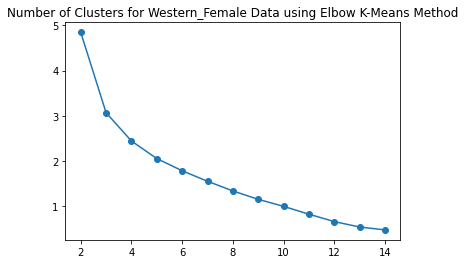

In [55]:
# Using Elbow Method to determine optimal number of clusters for Western_Female Data

clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias = []

for c in clusters_range:
    kmeans = KMeans(init = 'k-means++', n_clusters=c, n_init=100, random_state=0).fit(Western_Female)
    inertias.append(kmeans.inertia_)
    
plt.figure()
plt.plot(clusters_range, inertias, marker='o')
plt.title('Number of Clusters for Western_Female Data using Elbow K-Means Method')
plt.show()

# The optimal nubmer of clusters appears to be 2 or 3. The code referenced was from 
# an Analytics Vidhya article titled "A Detailed Introduction to K-Means Clustering in Python!" Here is a link to the
# referenced code: https://www.analyticsvidhya.com/blog/2020/12/a-detailed-introduction-to-k-means-clustering-in-python/.

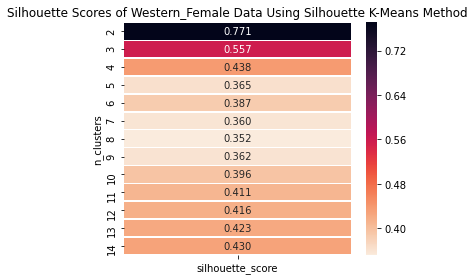

In [56]:
# Clusters using Silhouette Method for K-Means in Western_Female Data

from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range = range(2,15)
results = []

for c in clusters_range:
    clusterer = KMeans(init='k-means++', n_clusters = c, n_init=100, random_state=0)
    cluster_labels = clusterer.fit_predict(Western_Female)
    silhouette_avg = silhouette_score(Western_Female, cluster_labels)
    results.append([c,silhouette_avg])
    
    
result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

plt.title('Silhouette Scores of Western_Female Data Using Silhouette K-Means Method')

plt.figure
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

# Results show that the optimal number of clusters is 2 with a silhouette score of 0.771. The code referenced was from 
# an Analytics Vidhya article titled "A Detailed Introduction to K-Means Clustering in Python!" Here is a link to the
# referenced code: https://www.analyticsvidhya.com/blog/2020/12/a-detailed-introduction-to-k-means-clustering-in-python/.

In [148]:
# Prediction and Male Columns for Western Male ANN

x4=Western_Male.values
y4=prediction_col2.values

# Dataset is split into training and testing dataset

x_train4, x_test4, y_train4, y_test4 = train_test_split(x4, y4, test_size=0.3, random_state=50)

# Dataset is split into a 70:30 ratio.

In [149]:
# Data is scaled using StandardScaler
  
sc4 = StandardScaler()  


# Training and Testing data is created

x_train4 = sc4.fit_transform(x_train4)  
x_test4 = sc4.transform(x_test4) 

In [150]:
# Algorithm Created using Training Data

from sklearn.neural_network import MLPClassifier  

mlp4 = MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=3000)  
mlp4.fit(x_train4, y_train4) 

# MLP Classifier has hidden layer sizes of 20, 20, and 20, along with max iteration of 3,000.

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=3000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [151]:
# Predictions are created for Western Male ANN Model

predictions_west2 = mlp4.predict(x_test4)
print(predictions_west2)

# Predictions_west2 ranges from 0-16.

[ 3  8 11  0 10 14 14  1  6  5 14  8  8  2 15 14  4 15  4 14  1 12  8 10
  8 10  4 14  8  8 14 14 10 13  5]


In [152]:
# Evaluation of Western Male ANN Model

from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test4,predictions_west2))  
print(classification_report(y_test4,predictions_west2)) 

# Results show that there is an accuracy rate of 25% and an f1 rate of 12% for male graduation rate based on 
#ethnicity and Western counties. The best accuracy rates occurred in county 11 or Montrose County.
# The ANN code referenced was in "Week 5 - Artificial Neural Network (ANN)" from Regis University. Here is a link
# reference from the code: http://localhost:8888/notebooks/Downloads/FTE_Week5(2).ipynb.

[[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 0 0]
 [0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       1.00      0.20      0.33         5
           4       0.33      1.00      0.50         1
           5       0.00      0.00      0.00  

/Users/benjaminreimer/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/benjaminreimer/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/benjaminreimer/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [155]:
# Decision Tree for Male Gradution Rate by Western Counties

clf4 = DecisionTreeClassifier()
clf4 = clf4.fit(x_train4,y_train4)
y_pred4 = clf4.predict(x_test4)
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

# The Accuracy rate for the decision tree is 11%. The code referenced to make the decision tree was from Sonia Motwani's
# article titled "Decision Tree Implementation in Python with Example". Here is a link to the website:
#  https://in.springboard.com/blog/decision-tree-implementation-in-python/. 

Accuracy: 0.11428571428571428


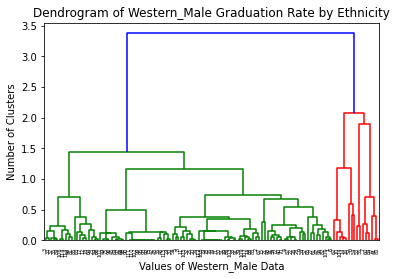

In [58]:
# Dendrogram of Western_Male data

WM = Western_Male.values
import scipy.cluster.hierarchy as sch
dendro = sch.dendrogram(sch.linkage(WM, method = 'ward'))
plt.title('Dendrogram of Western_Male Graduation Rate by Ethnicity')
plt.xlabel('Values of Western_Male Data')
plt.ylabel('Number of Clusters')

plt.show()


# Dendrogram shows that there would be a maximum of 2 clusters.

In [157]:
# Agglomerative Clustering looking at the Western_Male Data

from sklearn.cluster import AgglomerativeClustering
hc4 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc4 = hc4.fit_predict(Western_Male)
print(y_hc4)

# Predictions for number of clusters for Metro_Male are created from 0-1.

[0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1]


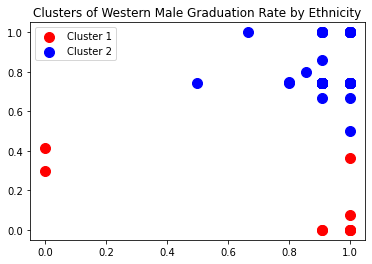

In [158]:
# Visualizing WM Clusters

plt.scatter(WM[y_hc4 == 0, 0], WM[y_hc4 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(WM[y_hc4 == 1, 0], WM[y_hc4 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('Clusters of Western Male Graduation Rate by Ethnicity')
plt.legend()
plt.show()

# Two clusters of Western Female Graduation Rate by Ethnicity are created. The code referenced for the three lines 
# of code was from
# MLTut.com in an article titled "Hierarchical Clustering in Python, Step by Step Complete Guide". Here is a link
# to the article: https://www.mltut.com/hierarchical-clustering-in-python-
#step-by-step-complete guide/:~:text=The%20final%20cluster%20in%20the%20Hierarchical%20cluster%20co
#mbines,gained%20brief%20knowledge%20about%20Clustering%20and%20its%20types.

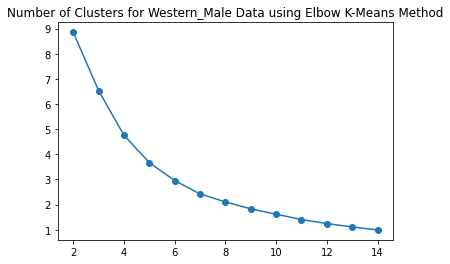

In [60]:
# Using Elbow Method to determine optimal number of clusters for Western_Male Data

clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias = []

for c in clusters_range:
    kmeans = KMeans(init = 'k-means++', n_clusters=c, n_init=100, random_state=0).fit(Western_Male)
    inertias.append(kmeans.inertia_)
    
plt.figure()
plt.plot(clusters_range, inertias, marker='o')
plt.title('Number of Clusters for Western_Male Data using Elbow K-Means Method')
plt.show()

# The optimal nubmer of clusters appears to be 2 or 3. The code referenced was from 
# an Analytics Vidhya article titled "A Detailed Introduction to K-Means Clustering in Python!" Here is a link to the
# referenced code: https://www.analyticsvidhya.com/blog/2020/12/a-detailed-introduction-to-k-means-clustering-in-python/.

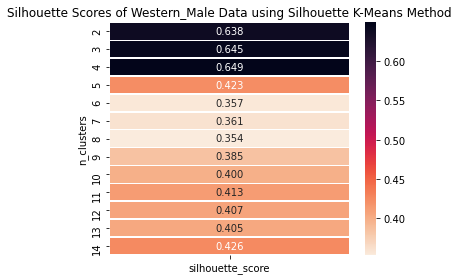

In [109]:
# Clusters using Silhouette Method for K-Means in Western_Male Data

from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range = range(2,15)
results = []

for c in clusters_range:
    clusterer = KMeans(init='k-means++', n_clusters = c, n_init=100, random_state=0)
    cluster_labels = clusterer.fit_predict(Western_Male)
    silhouette_avg = silhouette_score(Western_Male, cluster_labels)
    results.append([c,silhouette_avg])
    
    
result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

plt.title('Silhouette Scores of Western_Male Data using Silhouette K-Means Method')

plt.figure
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

# Results show that the optimal number of clusters is 4 with a silhouette score of 0.649. The code referenced was from 
# an Analytics Vidhya article titled "A Detailed Introduction to K-Means Clustering in Python!" Here is a link to the
# referenced code: https://www.analyticsvidhya.com/blog/2020/12/a-detailed-introduction-to-k-means-clustering-in-python/.

In [42]:
# Eastern Plains Data

E1 = df2.iloc[74:94]
E2 = df2.iloc[94:102]
E3 = df2.iloc[118:126]
E4 = df2.iloc[150:154]
E5 = df2.iloc[178:198]
E6 = df2.iloc[318:326]
E7 = df2.iloc[326:346]
E8 = df2.iloc[398:410]
E9 = df2.iloc[410:426]
E10 = df2.iloc[466:482]
E11 = df2.iloc[482:506]
E12 = df2.iloc[522:530]
E13 = df2.iloc[534:550]
E14 = df2.iloc[550:558]
E15 = df2.iloc[614:622]
E16 = df2.iloc[634:654]
E17 = df2.iloc[654:702]
E18 = df2.iloc[702:718]


Eastern = pd.concat([E1,E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12, E13, E14, E15, E16, E17, E18])
Eastern

# Eastern data contains 18 different counties and their data.

,County Name,Organization Code,Organization Name,"""Class Of..."" Anticpated Year of Graduation Cohort",Number of Years After Entering High School,All Students Final Grad Base,All Students Graduates Total,All Students Graduation Rate,All Students Completers Total,All Students Completion Rate,...,Two or More Races Female Final Grad Base,Two or More Races Female Graduates,Two or More Races Female Graduation Rate,Two or More Races Female Completers Total,Two or More Races Female Completion Rate,Two or More Races Male Final Grad Base,Two or More Races Male Graduates,Two or More Races Male Graduation Rate,Two or More Races Male Completers Total,Two or More Races Male Completion Rate
74,BACA,230.0,Walsh RE-1,2019-2020,4.0,7.0,7.0,1.000000,7.0,1.000000,...,0.0,0.0,0.883445,0.0,0.90862,0.0,0.0,0.81813,0.0,0.85653
75,BACA,230.0,Walsh RE-1,2018-2019,5.0,14.0,14.0,1.000000,14.0,1.000000,...,0.0,0.0,0.883445,0.0,0.90862,0.0,0.0,0.81813,0.0,0.85653
76,BACA,230.0,Walsh RE-1,2017-2018,6.0,10.0,9.0,0.900000,9.0,0.900000,...,0.0,0.0,0.883445,0.0,0.90862,0.0,0.0,0.81813,0.0,0.85653
77,BACA,230.0,Walsh RE-1,2016-2017,7.0,10.0,10.0,1.000000,10.0,1.000000,...,0.0,0.0,0.883445,0.0,0.90862,0.0,0.0,0.81813,0.0,0.85653
78,BACA,240.0,Pritchett RE-3,2019-2020,4.0,6.0,6.0,1.000000,6.0,1.000000,...,0.0,0.0,0.883445,0.0,0.90862,0.0,0.0,0.81813,0.0,0.85653
79,BACA,240.0,Pritchett RE-3,2018-2019,5.0,3.0,2.0,0.666667,2.0,0.666667,...,0.0,0.0,0.883445,0.0,0.90862,0.0,0.0,0.81813,0.0,0.85653
80,BACA,240.0,Pritchett RE-3,2017-2018,6.0,3.0,3.0,1.000000,3.0,1.000000,...,0.0,0.0,0.883445,0.0,0.90862,0.0,0.0,0.81813,0.0,0.85653
81,BACA,240.0,Pritchett RE-3,2016-2017,7.0,4.0,4.0,1.000000,4.0,1.000000,...,0.0,0.0,0.883445,0.0,0.90862,0.0,0.0,0.81813,0.0,0.85653
82,BACA,250.0,Springfield RE-4,2019-2020,4.0,14.0,14.0,1.000000,14.0,1.000000,...,0.0,0.0,0.883445,0.0,0.90862,0.0,0.0,0.81813,0.0,0.85653
83,BACA,250.0,Springfield RE-4,2018-2019,5.0,19.0,17.0,0.894737,18.0,0.947368,...,0.0,0.0,0.883445,0.0,0.90862,0.0,0.0,0.81813,0.0,0.85653


In [162]:
# Summary statistics for Eastern County data

Eastern.describe()

# Summary statistics for Eastern county date include count, mean, standard deviation, and quartile values

,Organization Code,Number of Years After Entering High School,All Students Final Grad Base,All Students Graduates Total,All Students Graduation Rate,All Students Completers Total,All Students Completion Rate,Female Final Grad Base,Female Graduates Total,Female Graduation Rate,...,Two or More Races Female Final Grad Base,Two or More Races Female Graduates,Two or More Races Female Graduation Rate,Two or More Races Female Completers Total,Two or More Races Female Completion Rate,Two or More Races Male Final Grad Base,Two or More Races Male Graduates,Two or More Races Male Graduation Rate,Two or More Races Male Completers Total,Two or More Races Male Completion Rate
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,...,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,2129.157143,5.500000,97.114286,84.671429,0.916058,86.517857,0.933220,47.585714,43.128571,0.941505,...,0.896429,0.782143,0.881234,0.800000,0.907886,0.903571,0.796429,0.827049,0.821429,0.867768
std,985.894403,1.120036,233.782090,200.335595,0.104403,204.904103,0.100044,115.226035,103.042173,0.104395,...,2.588918,2.315377,0.146179,2.362187,0.125841,2.436576,2.265050,0.165646,2.294665,0.136773
min,230.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1450.000000,4.750000,10.000000,9.000000,0.884480,9.000000,0.903029,4.000000,4.000000,0.916430,...,0.000000,0.000000,0.883445,0.000000,0.908620,0.000000,0.000000,0.818130,0.000000,0.856530
50%,2532.500000,5.500000,19.000000,18.000000,0.936277,18.000000,0.956522,9.000000,9.000000,1.000000,...,0.000000,0.000000,0.883445,0.000000,0.908620,0.000000,0.000000,0.818130,0.000000,0.856530
75%,3060.000000,6.250000,79.250000,64.000000,1.000000,66.250000,1.000000,36.000000,33.000000,1.000000,...,1.000000,0.000000,0.883445,1.000000,0.908620,1.000000,1.000000,0.818130,1.000000,0.856530
max,3230.000000,7.000000,1598.000000,1348.000000,1.000000,1390.000000,1.000000,802.000000,707.000000,1.000000,...,21.000000,18.000000,1.000000,19.000000,1.000000,20.000000,20.000000,1.000000,20.000000,1.000000


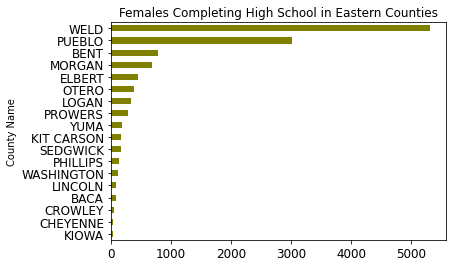

In [163]:
# Females Completing High School by Eastern Counties

east_totals = Eastern.groupby("County Name")["Female Completers Total"].sum().sort_values()
east_totals
east_totals.plot(kind="barh", fontsize=12, color = 'olive', title = 'Females Completing High School in Eastern Counties')

# The top 5 eastern counties where females completed high school were Weld, Pueblo, Bent, Morgan, and Elbert.

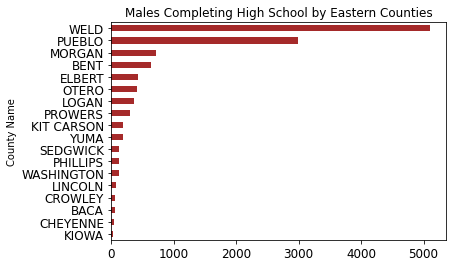

In [164]:
# Males Completing High School by Eastern Counties

east2_totals = Eastern.groupby("County Name")["Male Completers Total"].sum().sort_values()
east2_totals
east2_totals.plot(kind="barh", fontsize=12, color = 'brown', title = 'Males Completing High School by Eastern Counties')

# The top 5 eastern counties where females completed high school were Weld, Pueblo, Bent, Morgan, and Elbert.

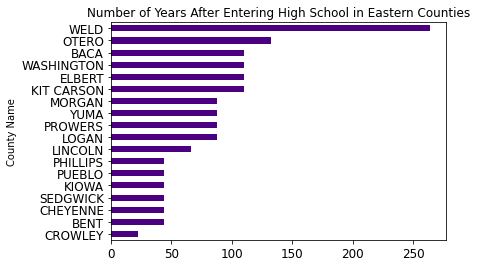

In [165]:
# Number of Years After Entering High School in Eastern counties

east_years = Eastern.groupby("County Name")["Number of Years After Entering High School"].sum().sort_values()
east_years
east_years.plot(kind="barh", fontsize=12, color = 'indigo', title = 'Number of Years After Entering High School in Eastern Counties')

# The top 5 eastern counties for students graduating high school after a number of years were Weld, Otero, Baca,
# Washingtion, and Elbert.

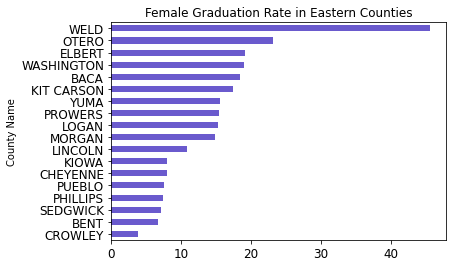

In [166]:
# Female Graduation Rate in Eastern Counties

female_east = Eastern.groupby("County Name")["Female Graduation Rate"].sum().sort_values()
female_east
female_east.plot(kind="barh", fontsize=12, color = 'slateblue', title = 'Female Graduation Rate in Eastern Counties')

# The top five Eastern counties with the best female graduation rate was Weld, Otero, Elbert, Washington, and Baca.

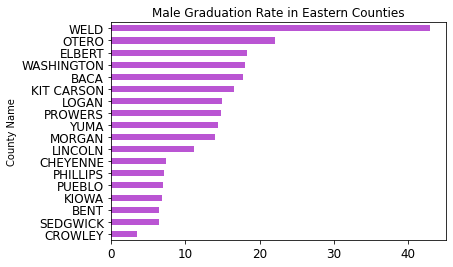

In [167]:
# Female Graduation Rate in Eastern Counties

male_east = Eastern.groupby("County Name")["Male Graduation Rate"].sum().sort_values()
male_east
male_east.plot(kind="barh", fontsize=12, color = 'mediumorchid', title = 'Male Graduation Rate in Eastern Counties')

# The top five Eastern counties with the best male graduation rate was Weld, Otero, Elbert, Washington, and Baca.

In [63]:
# Asian3 Male or Female Graduation Rate by Eastern Counties

asian3_male = Eastern.groupby("County Name")["Asian Male Graduation Rate"].sum().sort_values()
asian3_male
asian3_female = Eastern.groupby("County Name")["Asian Female Graduation Rate"].sum().sort_values()
asian3_female
Asian3 = pd.concat([asian3_male, asian3_female])
Asian3
Asian3.describe()

# Summary statistis for Asian3 data include count, mean, standard deviation, and quartile values. The code used to
# group data together was from an article written by Anirudh Nanduri titled "Different ways to create, subset,
# and combine data frames using pandas". Here is a link to the article: https://towardsdatascience.com/different-ways-
#to-create-subset-and-combine-dataframes-using-pandas-e7227330a7f1.

count    36.000000
mean     14.295614
std       9.095824
min       3.635945
25%       7.370754
50%      14.634796
75%      18.202481
max      44.695086
dtype: float64

In [64]:
# Outliers in Asian3 Data

def detect_outlier(Asian3):
    q1, q3 = np.percentile(sorted(Asian3), [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in Asian3 if x <= lower_bound or x >= upper_bound]
    return outliers
detect_outlier((Asian3))

# The two outliers in Asian3 data are 44.0 and 44.7. The code referenced when determining the number of outliers was 
# from the One_Stop Data website from an article titled "Easy Outlier Detection in Python". Here is the link to the 
# website: https://onestopdataanalysis.com/python-outlier-detection/. 

[44.02502301587481, 44.69508646096996]

In [65]:
# Black Male and Female Graduation Rate by Eastern Counties

black3_male = Eastern.groupby("County Name")["Black or African American Male Graduation Rate"].sum().sort_values()
black3_male
black3_female = Eastern.groupby("County Name")["Black or African American Female Graduation Rate"].sum().sort_values()
black3_female
Black3 = pd.concat([black3_male, black3_female])
Black3
Black3.describe()

#Summary statistics for Black3 data include count, mean, standard deviation, and quartile values. The code used to
# group data together was from an article written by Anirudh Nanduri titled "Different ways to create, subset,
# and combine data frames using pandas". Here is a link to the article: https://towardsdatascience.com/different-ways-
#to-create-subset-and-combine-dataframes-using-pandas-e7227330a7f1.

count    36.000000
mean     12.582860
std       8.291919
min       2.981234
25%       6.553730
50%      11.681072
75%      15.288205
max      42.240698
dtype: float64

In [66]:
# Outliers in Black3 Data

def detect_outlier(Black3):
    q1, q3 = np.percentile(sorted(Black3), [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in Black3 if x <= lower_bound or x >= upper_bound]
    return outliers
detect_outlier((Black3))

# The two outliers in Black3 data are 37.8 and 42.2. The code referenced when determining the number of outliers was 
# from the One_Stop Data website from an article titled "Easy Outlier Detection in Python". Here is the link to the 
# website: https://onestopdataanalysis.com/python-outlier-detection/. 

[37.75745995413939, 42.24069813360907]

In [67]:
# Hispanic Male and Female Graduation Rate by Eastern Counties

hispanic3_male = Eastern.groupby("County Name")["Hispanic or Latino Male Graduation Rate"].sum().sort_values()
hispanic3_male
hispanic3_female = Eastern.groupby("County Name")["Hispanic or Latino Female Graduation Rate"].sum().sort_values()
hispanic3_female
Hispanic3 = pd.concat([hispanic3_male, hispanic3_female])
Hispanic3
Hispanic3.describe()

# Summary statistics for Hispanic3 data include count, mean, standard deviation, and quartile values. The code used to
# group data together was from an article written by Anirudh Nanduri titled "Different ways to create, subset,
# and combine data frames using pandas". Here is a link to the article: https://towardsdatascience.com/different-ways-
#to-create-subset-and-combine-dataframes-using-pandas-e7227330a7f1.

count    36.000000
mean     13.794816
std       8.969649
min       3.571429
25%       7.182029
50%      13.745059
75%      17.328618
max      44.342036
dtype: float64

In [68]:
# Outliers in Hispanic3 Data

def detect_outlier(Hispanic3):
    q1, q3 = np.percentile(sorted(Hispanic3), [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in Hispanic3 if x <= lower_bound or x >= upper_bound]
    return outliers
detect_outlier((Hispanic3))

# The two outliers in Hispanic3 data are 42.0 and 44.3. The code referenced when determining the number of outliers was 
# from the One_Stop Data website from an article titled "Easy Outlier Detection in Python". Here is the link to the 
# website: https://onestopdataanalysis.com/python-outlier-detection/. 

[41.98815609983553, 44.342035631067226]

In [70]:
# White Male and Female Graduation Rate by Eastern Counties

white3_male = Eastern.groupby("County Name")["White Male Graduation Rate"].sum().sort_values()
white3_male
white3_female = Eastern.groupby("County Name")["White Female Graduation Rate"].sum().sort_values()
white3_female
White3 = pd.concat([white3_male, white3_female])
White3
White3.describe()

# Summary statistics for White3 data include count, mean, standard deviation, and quartile values. The code used to
# group data together was from an article written by Anirudh Nanduri titled "Different ways to create, subset,
# and combine data frames using pandas". Here is a link to the article: https://towardsdatascience.com/different-ways-
#to-create-subset-and-combine-dataframes-using-pandas-e7227330a7f1.

count    36.000000
mean     14.348145
std       9.151791
min       3.526515
25%       7.255607
50%      14.538133
75%      18.119597
max      45.663343
dtype: float64

In [71]:
# Outliers in White3 Data

def detect_outlier(White3):
    q1, q3 = np.percentile(sorted(White3), [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in White3 if x <= lower_bound or x >= upper_bound]
    return outliers
detect_outlier((White3))

# The two outliers in White3 data are 43.2. and 45.7. The code referenced when determining the number of outliers was 
# from the One_Stop Data website from an article titled "Easy Outlier Detection in Python". Here is the link to the 
# website: https://onestopdataanalysis.com/python-outlier-detection/. 

[43.1371593777252, 45.66334348121501]

In [72]:
# Other Male and Female Graduate Rate by Eastern Counties

native3_male = Eastern.groupby("County Name")["American Indian or Alaska Native Male Graduation Rate"].sum().sort_values()
native3_male
native3_female = Eastern.groupby("County Name")["American Indian or Alaska Native Female Graduation Rate"].sum().sort_values()
native3_female
hawaiian3_male = Eastern.groupby("County Name")["Native Hawaiian or Other Pacific Islander Male Graduation Rate"].sum().sort_values()
hawaiian3_male
hawaiian3_female = Eastern.groupby("County Name")["Native Hawaiian or Other Pacific Islander Female Graduation Rate"].sum().sort_values()
hawaiian3_female
Other3 = pd.concat([native3_male, native3_female, hawaiian3_male, hawaiian3_female])
Other3
Other3.describe()

# Summary statistics for Other3 data include count, mean, standard deviation, and quartile values. The code used to
# group data together was from an article written by Anirudh Nanduri titled "Different ways to create, subset,
# and combine data frames using pandas". Here is a link to the article: https://towardsdatascience.com/different-ways-
#to-create-subset-and-combine-dataframes-using-pandas-e7227330a7f1.

count    72.000000
mean     12.493281
std       8.050618
min       3.160376
25%       6.538546
50%      12.632514
75%      15.523282
max      42.255043
dtype: float64

In [73]:
# Outliers in Other3 Data

def detect_outlier(Other3):
    q1, q3 = np.percentile(sorted(Other3), [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in Other3 if x <= lower_bound or x >= upper_bound]
    return outliers
detect_outlier((Other3))

# The four outliers in Other3 data include 36.7, 40.6, 38.5, and 42.3. The code referenced when determining the number of outliers was 
# from the One_Stop Data website from an article titled "Easy Outlier Detection in Python". Here is the link to the 
# website: https://onestopdataanalysis.com/python-outlier-detection/. 

[36.65443598448763, 40.55881056211059, 38.4740423331021, 42.255042951369276]

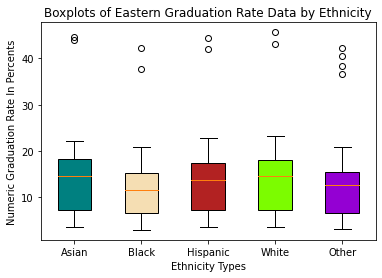

In [74]:
# Boxplots of Eastern Graduation Rate Data by Ethinicity

Eastern_boxplot_data = [Asian3, Black3, Hispanic3, White3, Other3]
E = plt.boxplot(Eastern_boxplot_data,patch_artist=True,labels=['Asian','Black','Hispanic','White', 'Other'])
colors = ['teal', 'wheat', 'firebrick', 'lawngreen', 'darkviolet']
for patch, color in zip (E['boxes'], colors):
    patch.set_facecolor(color)
    
plt.title('Boxplots of Eastern Graduation Rate Data by Ethnicity')
plt.xlabel('Ethnicity Types')
plt.ylabel('Numeric Graduation Rate In Percents')

plt.show()

# There are five different boxplots based on ethnicity: Asian, Black, Hispanic, White, and Other. The Asian boxplot 
#showed two outliers, the Black boxplot had two outliers, the Hispanic boxplot had two outliers, the White boxplot had
#two outliers, and the Other boxplot had four outliers. The code I referenced to determine making boxplots was from 
# DataScience Made Simple website in an article titled "BOX PLOT IN PYTHON WITH MATPLOTLIB". Here is a link to the 
# website: https://www.datasciencemadesimple.com/box-plot-in-
#python/:~:text=boxplot%28%29%20function%20takes%20the%20data%20array%20to
#%20be,plotted.%20Create%20box%20plot%20in%20python%20with%20notch.

In [43]:
# Recategorizing County Name in Western Data with Numeric Values

Eastern['County Name'] = Eastern['County Name'].astype('category').cat.codes
Eastern

# County Names were renamed 0-17.

,County Name,Organization Code,Organization Name,"""Class Of..."" Anticpated Year of Graduation Cohort",Number of Years After Entering High School,All Students Final Grad Base,All Students Graduates Total,All Students Graduation Rate,All Students Completers Total,All Students Completion Rate,...,Two or More Races Female Final Grad Base,Two or More Races Female Graduates,Two or More Races Female Graduation Rate,Two or More Races Female Completers Total,Two or More Races Female Completion Rate,Two or More Races Male Final Grad Base,Two or More Races Male Graduates,Two or More Races Male Graduation Rate,Two or More Races Male Completers Total,Two or More Races Male Completion Rate
74,0,230.0,Walsh RE-1,2019-2020,4.0,7.0,7.0,1.000000,7.0,1.000000,...,0.0,0.0,0.883445,0.0,0.90862,0.0,0.0,0.81813,0.0,0.85653
75,0,230.0,Walsh RE-1,2018-2019,5.0,14.0,14.0,1.000000,14.0,1.000000,...,0.0,0.0,0.883445,0.0,0.90862,0.0,0.0,0.81813,0.0,0.85653
76,0,230.0,Walsh RE-1,2017-2018,6.0,10.0,9.0,0.900000,9.0,0.900000,...,0.0,0.0,0.883445,0.0,0.90862,0.0,0.0,0.81813,0.0,0.85653
77,0,230.0,Walsh RE-1,2016-2017,7.0,10.0,10.0,1.000000,10.0,1.000000,...,0.0,0.0,0.883445,0.0,0.90862,0.0,0.0,0.81813,0.0,0.85653
78,0,240.0,Pritchett RE-3,2019-2020,4.0,6.0,6.0,1.000000,6.0,1.000000,...,0.0,0.0,0.883445,0.0,0.90862,0.0,0.0,0.81813,0.0,0.85653
79,0,240.0,Pritchett RE-3,2018-2019,5.0,3.0,2.0,0.666667,2.0,0.666667,...,0.0,0.0,0.883445,0.0,0.90862,0.0,0.0,0.81813,0.0,0.85653
80,0,240.0,Pritchett RE-3,2017-2018,6.0,3.0,3.0,1.000000,3.0,1.000000,...,0.0,0.0,0.883445,0.0,0.90862,0.0,0.0,0.81813,0.0,0.85653
81,0,240.0,Pritchett RE-3,2016-2017,7.0,4.0,4.0,1.000000,4.0,1.000000,...,0.0,0.0,0.883445,0.0,0.90862,0.0,0.0,0.81813,0.0,0.85653
82,0,250.0,Springfield RE-4,2019-2020,4.0,14.0,14.0,1.000000,14.0,1.000000,...,0.0,0.0,0.883445,0.0,0.90862,0.0,0.0,0.81813,0.0,0.85653
83,0,250.0,Springfield RE-4,2018-2019,5.0,19.0,17.0,0.894737,18.0,0.947368,...,0.0,0.0,0.883445,0.0,0.90862,0.0,0.0,0.81813,0.0,0.85653


In [44]:
# Graduation Rates by Ethnicity and Female for Eastern region to make Eastern_Female data.

Eastern_Female = Eastern[["Asian Female Graduation Rate", "Black or African American Female Graduation Rate", "Hispanic or Latino Female Graduation Rate", "White Female Graduation Rate"]]
Eastern_Female

,Asian Female Graduation Rate,Black or African American Female Graduation Rate,Hispanic or Latino Female Graduation Rate,White Female Graduation Rate
74,0.921344,0.858173,0.889907,1.000000
75,0.921344,0.858173,0.889907,1.000000
76,0.921344,0.858173,1.000000,1.000000
77,0.921344,0.858173,1.000000,1.000000
78,0.921344,0.858173,0.889907,1.000000
79,0.921344,0.858173,0.500000,1.000000
80,0.921344,0.858173,0.889907,0.922075
81,0.921344,0.858173,1.000000,1.000000
82,0.921344,0.858173,1.000000,1.000000
83,0.921344,0.858173,1.000000,0.777778


In [45]:
# Graduation Rates by Ethnicity and Male in Eastern region grouped to make Eastern_Male data.

Eastern_Male = Eastern[["Asian Male Graduation Rate", "Black or African American Male Graduation Rate", "Hispanic or Latino Male Graduation Rate", "White Male Graduation Rate"]]
Eastern_Male

,Asian Male Graduation Rate,Black or African American Male Graduation Rate,Hispanic or Latino Male Graduation Rate,White Male Graduation Rate
74,0.908986,0.745308,0.821603,1.000000
75,0.908986,0.745308,1.000000,1.000000
76,0.908986,0.745308,1.000000,0.750000
77,0.908986,0.745308,1.000000,1.000000
78,0.908986,0.745308,0.821603,1.000000
79,0.908986,0.745308,0.821603,0.862505
80,0.908986,0.745308,0.821603,1.000000
81,0.908986,0.745308,0.821603,1.000000
82,0.908986,0.745308,1.000000,1.000000
83,0.908986,0.745308,1.000000,1.000000


In [46]:
# Prediction of Eastern by looking at the County Name Variable

prediction_col3 = Eastern['County Name']
prediction_col3

# Predictions for prediction_col4 range from 0-17.

74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      1
95      1
96      1
97      1
98      1
99      1
100     1
101     1
118     2
119     2
       ..
688    16
689    16
690    16
691    16
692    16
693    16
694    16
695    16
696    16
697    16
698    16
699    16
700    16
701    16
702    17
703    17
704    17
705    17
706    17
707    17
708    17
709    17
710    17
711    17
712    17
713    17
714    17
715    17
716    17
717    17
Name: County Name, Length: 280, dtype: int8

In [47]:
# Prediction and Female Columns for Eastern_Female ANN

x5=Eastern_Female.values
y5=prediction_col3.values

# Dataset is split into training and testing dataset

x_train5, x_test5, y_train5, y_test5 = train_test_split(x5, y5, test_size=0.3, random_state=50)

# Dataset is split into 70:30 ratio.

In [48]:
# Data is scaled using StandardScaler

sc5 = StandardScaler()  

# Training and Testing data is created

x_train5 = sc5.fit_transform(x_train5)  
x_test5 = sc5.transform(x_test5) 

In [49]:
# Algorithm Created using Training Data

from sklearn.neural_network import MLPClassifier  

mlp5 = MLPClassifier(hidden_layer_sizes=(50, 50, 50), max_iter=3000)  
mlp5.fit(x_train5, y_train5) 

# MLP Classifier has 3 hidden layer sizes of 50, 50, and 50, along with a max iteration of 3,000

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=3000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [51]:
# Predictions are created for Eastern_Female ANN Model

predictions_east = mlp5.predict(x_test5)
print(predictions_east)

# Predicions for x_test5 range from 0-17.

[10 16  1  8 16  4 10  4 17  6 10 10  8  6 10  6  8 10  8 10 10 10  8 10
 17 10 10  8  8 17 11 10  8  8  8  8  7 11  8  8  4 10  8 17  4 10  8 10
  8 10 10  8 10 16 10  8 13 16  4 10  0  8 10  8 10 10 10 14 10 16  8  8
  8  4  7 10  8  4 11 16 10 16 10 10]


In [52]:
# Evaluation of Eastern_Female ANN Model

from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test5,predictions_east))  
print(classification_report(y_test5,predictions_east)) 

# Results show that there is an accuracy rate of 12% and an f1 rate of 8% for female graduation rate based on 
#ethnicity and Eastern counties. The best accuracy rate was from county 13, or Pueblo County.
# The ANN code referenced was in "Week 5 - Artificial Neural Network (ANN)" from Regis University. Here is a link
# reference from the code: http://localhost:8888/notebooks/Downloads/FTE_Week5(2).ipynb.

[[0 0 0 0 1 0 0 0 3 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 3 2 0 0 0 0 0 1]
 [0 0 0 0 3 0 0 0 2 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 1 0 3 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 4 0 2 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 2 1 5 0 5 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 1 0 3 0 0 0 0 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.25      0.40         4
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           4       0.00   

/Users/benjaminreimer/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/benjaminreimer/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/benjaminreimer/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [55]:
# Decision Tree for Female Gradution Rate by Eastern Counties

clf5 = DecisionTreeClassifier()
clf5 = clf5.fit(x_train5,y_train5)
y_pred5 = clf5.predict(x_test5)
print("Accuracy:",metrics.accuracy_score(y_test5, y_pred5))

# The Accuracy rate for the decision tree is 13%. The code referenced to make the decision tree was from Sonia Motwani's
# article titled "Decision Tree Implementation in Python with Example". Here is a link to the website:
#  https://in.springboard.com/blog/decision-tree-implementation-in-python/.

Accuracy: 0.13095238095238096


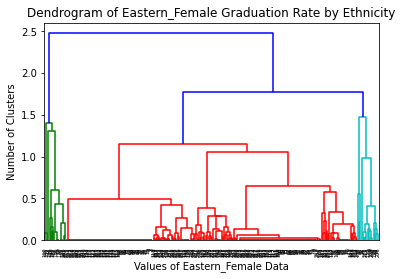

In [57]:
# Dendrogram of Eastern_Female data

EF = Eastern_Female.values
import scipy.cluster.hierarchy as sch
dendro = sch.dendrogram(sch.linkage(EF, method = 'ward'))
plt.title('Dendrogram of Eastern_Female Graduation Rate by Ethnicity')
plt.xlabel('Values of Eastern_Female Data')
plt.ylabel('Number of Clusters')

plt.show()

# Dendrogram shows that there would be a maximum of 2 clusters.

In [58]:
# Agglomerative Clustering looking at the Eastern_Female Data

from sklearn.cluster import AgglomerativeClustering
hc5 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc5 = hc5.fit_predict(Eastern_Female)
print(y_hc5)

# Predictions for number of clusters for Eastern_Female are created from 0-1.

[0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0]


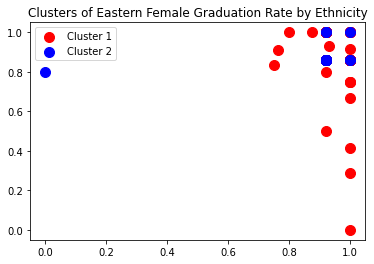

In [59]:
# Visualizing EF Clusters

plt.scatter(EF[y_hc5 == 0, 0], EF[y_hc5 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(EF[y_hc5 == 1, 0], EF[y_hc5 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('Clusters of Eastern Female Graduation Rate by Ethnicity')
plt.legend()
plt.show()

# Two clusters of Eastern Female Graduation Rate by Ethnicity are created. The code referenced for the three
# lines of code above was from
# MLTut.com in an article titled "Hierarchical Clustering in Python, Step by Step Complete Guide". Here is a link
# to the article: https://www.mltut.com/hierarchical-clustering-in-python-
#step-by-step-complete guide/:~:text=The%20final%20cluster%20in%20the%20Hierarchical%20cluster%20co
#mbines,gained%20brief%20knowledge%20about%20Clustering%20and%20its%20types.

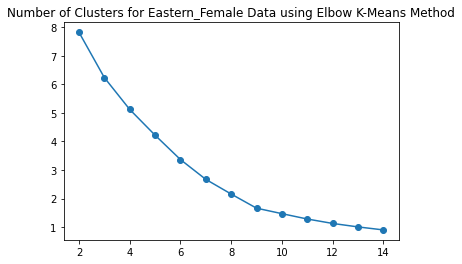

In [60]:
# Using Elbow Method to determine optimal number of clusters for Eastern_Female Data

clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias = []

for c in clusters_range:
    kmeans = KMeans(init = 'k-means++', n_clusters=c, n_init=100, random_state=0).fit(Eastern_Female)
    inertias.append(kmeans.inertia_)
    
plt.figure()
plt.plot(clusters_range, inertias, marker='o')
plt.title('Number of Clusters for Eastern_Female Data using Elbow K-Means Method')
plt.show()

# The optimal number fo clusters appears to be 2 or 3. The code referenced was from 
# an Analytics Vidhya article titled "A Detailed Introduction to K-Means Clustering in Python!" Here is a link to the
# referenced code: https://www.analyticsvidhya.com/blog/2020/12/a-detailed-introduction-to-k-means-clustering-in-python/.

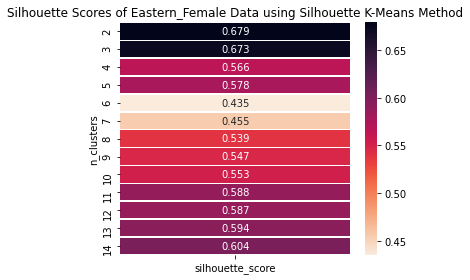

In [61]:
# Clusters using Silhouette Method for K-Means in Eastern_Female Data

from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range = range(2,15)
results = []

for c in clusters_range:
    clusterer = KMeans(init='k-means++', n_clusters = c, n_init=100, random_state=0)
    cluster_labels = clusterer.fit_predict(Eastern_Female)
    silhouette_avg = silhouette_score(Eastern_Female, cluster_labels)
    results.append([c,silhouette_avg])
    
    
result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

plt.title('Silhouette Scores of Eastern_Female Data using Silhouette K-Means Method')

plt.figure
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

# Results show that the optimal number of clusters is 2 with a silhouette score of 0.679. The code referenced was from 
# an Analytics Vidhya article titled "A Detailed Introduction to K-Means Clustering in Python!" Here is a link to the
# referenced code: https://www.analyticsvidhya.com/blog/2020/12/a-detailed-introduction-to-k-means-clustering-in-python/.

In [62]:
# Prediction and Male Columns for Eastern_Male ANN

x6=Eastern_Male.values
y6=prediction_col3.values

# Dataset is split into training and testing dataset

x_train6, x_test6, y_train6, y_test6 = train_test_split(x6, y6, test_size=0.3, random_state=50)

# Dataset is split into 70:30 ratio

In [63]:
# Data is scaled using StandardScaler

sc6 = StandardScaler()  

# Training and Testing data is created

x_train6 = sc6.fit_transform(x_train6)  
x_test6 = sc6.transform(x_test6) 

In [64]:
# Algorithm Created using Training Data

from sklearn.neural_network import MLPClassifier  

mlp6 = MLPClassifier(hidden_layer_sizes=(50, 50, 50), max_iter=3000)  
mlp6.fit(x_train6, y_train6) 

# MLP Classifier has 3 hidden layer sizes of 50 and a max iteration of 3,000.

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=3000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [65]:
# Predictions are created for Eastern male ANN Model

predictions_east2 = mlp6.predict(x_test6)
print(predictions_east2)

# Predictions_east2 range from 0-17.

[ 8 12 17 12 10  8 15  8  0  8 12  8  8 16 12  6  8  8  8 12 12 12 12 12
 16 10  8  8  8  5 12  8  8 12  8  8 13 10  4 12  4  6 12 16  8 12  8  8
 16 12 12  5  8 15  8 12 16 16  9 12 16  8 14 12 12  6 12 10 12 16  8  6
  8 16  7  4  4 15 12 15  8 16 17  9]


In [67]:
# Evaluation of Eastern Male ANN Model

from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test6,predictions_east2))  
print(classification_report(y_test6,predictions_east2)) 

# Results show that there is an accuracy rate of 9% and an f1 rate of 8% for male graduation rate based on 
#ethnicity and Eastern counties. The best accuracy rate occurred in county 17, or Weld County.
# The ANN code referenced was in "Week 5 - Artificial Neural Network (ANN)" from Regis University. Here is a link
# reference from the code: http://localhost:8888/notebooks/Downloads/FTE_Week5(2).ipynb.

[[0 0 0 0 1 0 0 0 2 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 2 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 3 1 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 2 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 3 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 3 0 0 0 2 0 0 0 0 0]
 [1 0 0 0 1 0 2 1 3 1 0 0 3 0 1 1 3 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 1 0 0 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           4       0.00   

/Users/benjaminreimer/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/benjaminreimer/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/benjaminreimer/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [70]:
# Decision Tree for Male Gradution Rate by Eastern Counties

clf6 = DecisionTreeClassifier()
clf6 = clf6.fit(x_train6,y_train6)
y_pred6 = clf6.predict(x_test6)
print("Accuracy:",metrics.accuracy_score(y_test6, y_pred6))

# The Accuracy rate for the decision tree is 11%. The code referenced to make the decision tree was from Sonia Motwani's
# article titled "Decision Tree Implementation in Python with Example". Here is a link to the website:
#  https://in.springboard.com/blog/decision-tree-implementation-in-python/.

Accuracy: 0.10714285714285714


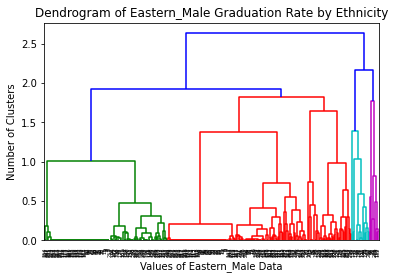

In [81]:
# Dendrogram of Eastern_Male data

EM = Eastern_Male.values
import scipy.cluster.hierarchy as sch
dendro = sch.dendrogram(sch.linkage(EM, method = 'ward'))
plt.title('Dendrogram of Eastern_Male Graduation Rate by Ethnicity')
plt.xlabel('Values of Eastern_Male Data')
plt.ylabel('Number of Clusters')


plt.show()


# Dendrogram shows that there would be a maximum of 2 clusters.

In [316]:
# Agglomerative Clustering looking at the Eastern_Male Data

from sklearn.cluster import AgglomerativeClustering
hc6 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc6 = hc6.fit_predict(Eastern_Male)
print(y_hc6)

# Predictions for number of clusters for Eastern_Male are created from 0-1.

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1]


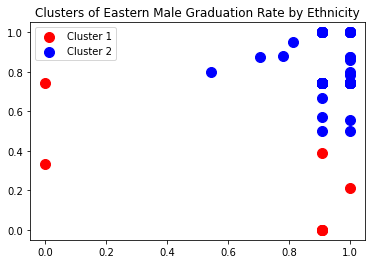

In [317]:
# Visualizing EM Clusters

plt.scatter(EM[y_hc6 == 0, 0], EM[y_hc6 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(EM[y_hc6 == 1, 0], EM[y_hc6 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('Clusters of Eastern Male Graduation Rate by Ethnicity')
plt.legend()
plt.show()

# Two clusters of Eastern Male Graduation Rate by Ethnicity are created. The code referenced for the three
# lines of code above was from
# MLTut.com in an article titled "Hierarchical Clustering in Python, Step by Step Complete Guide". Here is a link
# to the article: https://www.mltut.com/hierarchical-clustering-in-python-
#step-by-step-complete guide/:~:text=The%20final%20cluster%20in%20the%20Hierarchical%20cluster%20co
#mbines,gained%20brief%20knowledge%20about%20Clustering%20and%20its%20types.

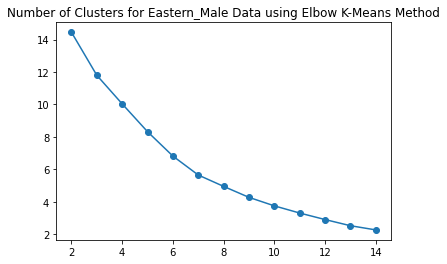

In [83]:
# Using Elbow Method to determine optimal number of clusters for Eastern_Male Data

clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias = []

for c in clusters_range:
    kmeans = KMeans(init = 'k-means++', n_clusters=c, n_init=100, random_state=0).fit(Eastern_Male)
    inertias.append(kmeans.inertia_)
    
plt.figure()
plt.plot(clusters_range, inertias, marker='o')
plt.title('Number of Clusters for Eastern_Male Data using Elbow K-Means Method')
plt.show()

# The optimal number of clusters appears to be 2 or 3. The code referenced was from 
# an Analytics Vidhya article titled "A Detailed Introduction to K-Means Clustering in Python!" Here is a link to the
# referenced code: https://www.analyticsvidhya.com/blog/2020/12/a-detailed-introduction-to-k-means-clustering-in-python/.

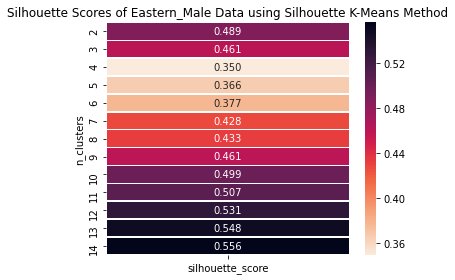

In [107]:
# Clusters using Silhouette Method for K-Means in Eastern_Male Data

from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range = range(2,15)
results = []

for c in clusters_range:
    clusterer = KMeans(init='k-means++', n_clusters = c, n_init=100, random_state=0)
    cluster_labels = clusterer.fit_predict(Eastern_Male)
    silhouette_avg = silhouette_score(Eastern_Male, cluster_labels)
    results.append([c,silhouette_avg])
    
    
result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

plt.title('Silhouette Scores of Eastern_Male Data using Silhouette K-Means Method')

plt.figure
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

# Results show that the optimal number of clusters is 14 with a silhouette score of 0.498. The code referenced was from 
# an Analytics Vidhya article titled "A Detailed Introduction to K-Means Clustering in Python!" Here is a link to the
# referenced code: https://www.analyticsvidhya.com/blog/2020/12/a-detailed-introduction-to-k-means-clustering-in-python/.

In [9]:
# Southwestern Data

SW1 = df2.iloc[34:42]
SW2 = df2.iloc[70:74]
SW3 = df2.iloc[130:142]
SW4 = df2.iloc[142:150]
SW5 = df2.iloc[154:158]
SW6 = df2.iloc[166:170]
SW7 = df2.iloc[258:270]
SW8 = df2.iloc[298:302]
SW9 = df2.iloc[302:310]
SW10 = df2.iloc[350:362]
SW11 = df2.iloc[374:398]
SW12 = df2.iloc[438:442]
SW13 = df2.iloc[446:458]
SW14 = df2.iloc[566:578]
SW15 = df2.iloc[590:602]
SW16 = df2.iloc[602:606]
SW17 = df2.iloc[606:614]
SW18 = df2.iloc[626:634]

Southwestern = pd.concat([SW1,SW2, SW3, SW4, SW5, SW6, SW7, SW8, SW9, SW10, SW11, SW12, SW13, SW14, SW15, SW16, SW17, SW18])
Southwestern

# Southwestern Data contains 18 different counties.

,County Name,Organization Code,Organization Name,"""Class Of..."" Anticpated Year of Graduation Cohort",Number of Years After Entering High School,All Students Final Grad Base,All Students Graduates Total,All Students Graduation Rate,All Students Completers Total,All Students Completion Rate,...,Two or More Races Female Final Grad Base,Two or More Races Female Graduates,Two or More Races Female Graduation Rate,Two or More Races Female Completers Total,Two or More Races Female Completion Rate,Two or More Races Male Final Grad Base,Two or More Races Male Graduates,Two or More Races Male Graduation Rate,Two or More Races Male Completers Total,Two or More Races Male Completion Rate
34,ALAMOSA,100.0,Alamosa RE-11J,2019-2020,4.0,145.0,129.0,0.889655,129.0,0.889655,...,1.0,1.0,1.000000,1.0,1.00000,2.0,2.0,1.000000,2.0,1.000000
35,ALAMOSA,100.0,Alamosa RE-11J,2018-2019,5.0,171.0,149.0,0.871345,150.0,0.877193,...,3.0,3.0,1.000000,3.0,1.00000,0.0,0.0,0.818130,0.0,0.856530
36,ALAMOSA,100.0,Alamosa RE-11J,2017-2018,6.0,138.0,123.0,0.891304,126.0,0.913043,...,0.0,0.0,0.883445,0.0,0.90862,2.0,2.0,1.000000,2.0,1.000000
37,ALAMOSA,100.0,Alamosa RE-11J,2016-2017,7.0,134.0,110.0,0.820896,112.0,0.835821,...,0.0,0.0,0.883445,0.0,0.90862,1.0,1.0,1.000000,1.0,1.000000
38,ALAMOSA,110.0,Sangre De Cristo Re-22J,2019-2020,4.0,16.0,16.0,1.000000,16.0,1.000000,...,1.0,1.0,1.000000,1.0,1.00000,0.0,0.0,0.818130,0.0,0.856530
39,ALAMOSA,110.0,Sangre De Cristo Re-22J,2018-2019,5.0,20.0,20.0,1.000000,20.0,1.000000,...,0.0,0.0,0.883445,0.0,0.90862,0.0,0.0,0.818130,0.0,0.856530
40,ALAMOSA,110.0,Sangre De Cristo Re-22J,2017-2018,6.0,11.0,11.0,1.000000,11.0,1.000000,...,0.0,0.0,0.883445,0.0,0.90862,0.0,0.0,0.818130,0.0,0.856530
41,ALAMOSA,110.0,Sangre De Cristo Re-22J,2016-2017,7.0,19.0,19.0,1.000000,19.0,1.000000,...,0.0,0.0,0.883445,0.0,0.90862,1.0,1.0,1.000000,1.0,1.000000
70,ARCHULETA,220.0,Archuleta County 50 Jt,2019-2020,4.0,79.0,73.0,0.924051,73.0,0.924051,...,0.0,0.0,0.883445,0.0,0.90862,0.0,0.0,0.818130,0.0,0.856530
71,ARCHULETA,220.0,Archuleta County 50 Jt,2018-2019,5.0,83.0,73.0,0.879518,74.0,0.891566,...,1.0,0.0,0.000000,0.0,0.00000,1.0,1.0,1.000000,1.0,1.000000


In [10]:
#Summary statistics for Southwestern data

Southwestern.describe()

#Summary statistics for Southwestern data include count, mean, standard deviation, and quartile values.

,Organization Code,Number of Years After Entering High School,All Students Final Grad Base,All Students Graduates Total,All Students Graduation Rate,All Students Completers Total,All Students Completion Rate,Female Final Grad Base,Female Graduates Total,Female Graduation Rate,...,Two or More Races Female Final Grad Base,Two or More Races Female Graduates,Two or More Races Female Graduation Rate,Two or More Races Female Completers Total,Two or More Races Female Completion Rate,Two or More Races Male Final Grad Base,Two or More Races Male Graduates,Two or More Races Male Graduation Rate,Two or More Races Male Completers Total,Two or More Races Male Completion Rate
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,...,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,1666.750000,5.500000,56.837500,49.193750,0.900985,50.418750,0.917424,27.675000,24.900000,0.933059,...,0.681250,0.581250,0.889809,0.612500,0.912360,0.731250,0.600000,0.829367,0.618750,0.869391
std,875.747695,1.121544,72.083275,59.739108,0.111782,61.683762,0.106417,36.536283,31.601529,0.095637,...,1.433524,1.168087,0.130388,1.278696,0.120978,1.461118,1.203768,0.157307,1.212471,0.123580
min,100.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1077.500000,4.750000,13.000000,12.000000,0.851198,12.000000,0.885676,5.000000,5.000000,0.890700,...,0.000000,0.000000,0.883445,0.000000,0.908620,0.000000,0.000000,0.818130,0.000000,0.856530
50%,1585.000000,5.500000,27.500000,23.500000,0.915960,24.500000,0.930890,14.000000,13.000000,1.000000,...,0.000000,0.000000,0.883445,0.000000,0.908620,0.000000,0.000000,0.818130,0.000000,0.856530
75%,2732.500000,6.250000,71.750000,65.250000,1.000000,68.000000,1.000000,34.250000,30.250000,1.000000,...,1.000000,1.000000,0.912584,1.000000,1.000000,1.000000,1.000000,0.818130,1.000000,0.916667
max,3020.000000,7.000000,376.000000,297.000000,1.000000,308.000000,1.000000,205.000000,164.000000,1.000000,...,9.000000,6.000000,1.000000,8.000000,1.000000,9.000000,8.000000,1.000000,8.000000,1.000000


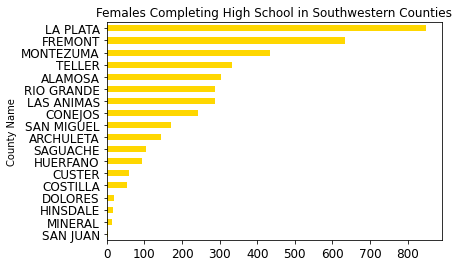

In [224]:
# Females Completing High School by Southwestern Counties

south_totals = Southwestern.groupby("County Name")["Female Completers Total"].sum().sort_values()
south_totals
south_totals.plot(kind="barh", fontsize=12, color = 'gold', title = 'Females Completing High School in Southwestern Counties')

# The top 5 counties where females completed high school were La Plata, Fremont, Montezuma, Teller, and Alamosa.

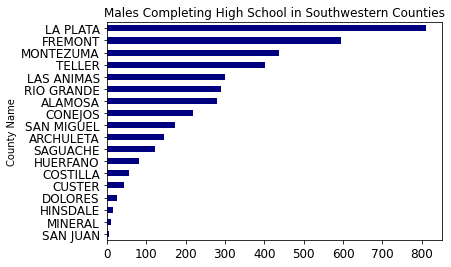

In [225]:
# Males Completing High School by Southwestern Counties

south2_totals = Southwestern.groupby("County Name")["Male Completers Total"].sum().sort_values()
south2_totals
south2_totals.plot(kind="barh", fontsize=12, color = 'navy', title = 'Males Completing High School in Southwestern Counties')

# The top 5 Southwestern counties where females completed high school were La Plata, Fremont, Montezuma, Teller, and Las Animas.

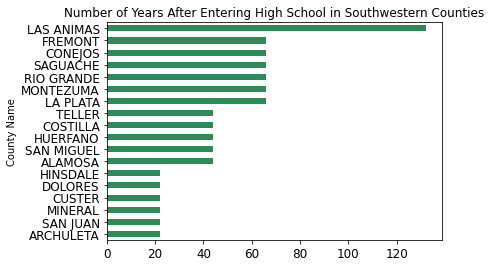

In [226]:
# Number of Years After Entering High School by Southwestern Counties

south_years = Southwestern.groupby("County Name")["Number of Years After Entering High School"].sum().sort_values()
south_years
south_years.plot(kind="barh", fontsize=12, color = 'seagreen', title = 'Number of Years After Entering High School in Southwestern Counties')

# The top 5 southwestern counties for number of years students completing high school were Las Animas, Fremont, Conejos
# Saguache, and Rio Grande.

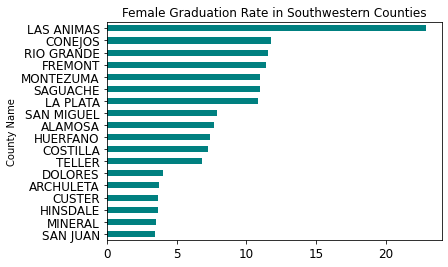

In [227]:
# Female Graduation Rate in Southwestern Counties
female_southwest = Southwestern.groupby("County Name")["Female Graduation Rate"].sum().sort_values()
female_southwest
female_southwest.plot(kind="barh", fontsize=12, color = 'teal', title = 'Female Graduation Rate in Southwestern Counties')

# The top five Eastern counties with the best female graduation rate was Las Animas, Conejos, Rio Grande, Fremont, and Montezuma.

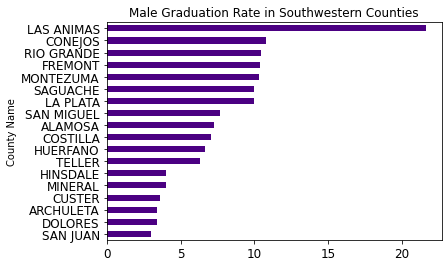

In [228]:
# Male Graduation Rate in Southwestern Counties
male_southwest = Southwestern.groupby("County Name")["Male Graduation Rate"].sum().sort_values()
male_southwest
male_southwest.plot(kind="barh", fontsize=12, color = 'indigo', title = 'Male Graduation Rate in Southwestern Counties')

# The top five Eastern counties with the best male graduation rate was Las Animas, Conejos, Rio Grande, Fremont, and Montezuma.

In [86]:
# Asian Male and Female Graduation Rate by Southwestern Counties

asian4_male = Southwestern.groupby("County Name")["Asian Male Graduation Rate"].sum().sort_values()
asian4_male
asian4_female = Southwestern.groupby("County Name")["Asian Female Graduation Rate"].sum().sort_values()
asian4_female
Asian4 = pd.concat([asian4_male, asian4_female])
Asian4
Asian4.describe()

# Summary statistics for Asian4 include count, mean, standard deviation, and quartile values. The code used to
# group data together was from an article written by Anirudh Nanduri titled "Different ways to create, subset,
# and combine data frames using pandas". Here is a link to the article: https://towardsdatascience.com/different-ways-
#to-create-subset-and-combine-dataframes-using-pandas-e7227330a7f1.

count    36.000000
mean      8.141782
std       4.613706
min       2.764033
25%       3.685377
50%       7.451664
75%      10.998850
max      22.348228
dtype: float64

In [87]:
# Outliers in Asian4 Data

def detect_outlier(Asian4):
    q1, q3 = np.percentile(sorted(Asian4), [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in Asian4 if x <= lower_bound or x >= upper_bound]
    return outliers
detect_outlier((Asian4))

# The two outliers for Asian4 are 22.0 and 22.3. The code referenced when determining the number of outliers was 
# from the One_Stop Data website from an article titled "Easy Outlier Detection in Python". Here is the link to the 
# website: https://onestopdataanalysis.com/python-outlier-detection/. 

[21.99770010581328, 22.34822834717099]

In [88]:
# Black Male and Female Graduation Rate by Southwestern Counties

black4_male = Southwestern.groupby("County Name")["Black or African American Male Graduation Rate"].sum().sort_values()
black4_male
black4_female = Southwestern.groupby("County Name")["Black or African American Female Graduation Rate"].sum().sort_values()
black4_female
Black4 = pd.concat([black4_male, black4_female])
Black4
Black4.describe()

# Summary statistics for Black4 data include count, mean, standard deviation, and quartile values. The code used to
# group data together was from an article written by Anirudh Nanduri titled "Different ways to create, subset,
# and combine data frames using pandas". Here is a link to the article: https://towardsdatascience.com/different-ways-
#to-create-subset-and-combine-dataframes-using-pandas-e7227330a7f1.

count    36.000000
mean      7.038816
std       4.167804
min       2.235925
25%       3.432691
50%       6.217159
75%       9.110894
max      21.163456
dtype: float64

In [89]:
# Outliers in Black4 Data

def detect_outlier(Black4):
    q1, q3 = np.percentile(sorted(Black4), [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in Black4 if x <= lower_bound or x >= upper_bound]
    return outliers
detect_outlier((Black4))

# The two outliers for Black4 are 18.7 and 21.2. The code referenced when determining the number of outliers was 
# from the One_Stop Data website from an article titled "Easy Outlier Detection in Python". Here is the link to the 
# website: https://onestopdataanalysis.com/python-outlier-detection/. 

[18.651475972484036, 21.163456037948535]

In [90]:
# Hispanic Male and Female Graduation Rate by Southwestern Counties

hispanic4_male = Southwestern.groupby("County Name")["Hispanic or Latino Male Graduation Rate"].sum().sort_values()
hispanic4_male
hispanic4_female = Southwestern.groupby("County Name")["Hispanic or Latino Female Graduation Rate"].sum().sort_values()
hispanic4_female
Hispanic4 = pd.concat([hispanic4_male, hispanic4_female])
Hispanic4
Hispanic4.describe()

# Summary statistics for Hispanic4 are count, mean, standard deviation, and quartile values. The code used to
# group data together was from an article written by Anirudh Nanduri titled "Different ways to create, subset,
# and combine data frames using pandas". Here is a link to the article: https://towardsdatascience.com/different-ways-
#to-create-subset-and-combine-dataframes-using-pandas-e7227330a7f1.

count    36.000000
mean      7.879512
std       4.596686
min       2.821603
25%       3.752291
50%       7.228587
75%      10.241991
max      22.283640
dtype: float64

In [91]:
# Outliers in Hispanic4 Data

def detect_outlier(Hispanic4):
    q1, q3 = np.percentile(sorted(Hispanic4), [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in Hispanic4 if x <= lower_bound or x >= upper_bound]
    return outliers
detect_outlier((Hispanic4))

# The two outliers for Hispanic4 are 22.3 and 22.2. The code referenced when determining the number of outliers was 
# from the One_Stop Data website from an article titled "Easy Outlier Detection in Python". Here is the link to the 
# website: https://onestopdataanalysis.com/python-outlier-detection/. 

[22.283640358930516, 22.19574433364337]

In [92]:
# White Male and Female Graduation Rate by Southwestern Counties

white4_male = Southwestern.groupby("County Name")["White Male Graduation Rate"].sum().sort_values()
white4_male
white4_female = Southwestern.groupby("County Name")["White Female Graduation Rate"].sum().sort_values()
white4_female
White4 = pd.concat([white4_male, white4_female])
White4
White4.describe()

# Summary statistics for White4 are count, mean, standard deviation, and quartile values. The code used to
# group data together was from an article written by Anirudh Nanduri titled "Different ways to create, subset,
# and combine data frames using pandas". Here is a link to the article: https://towardsdatascience.com/different-ways-
#to-create-subset-and-combine-dataframes-using-pandas-e7227330a7f1.

count    36.000000
mean      8.040527
std       4.434041
min       3.283333
25%       3.862505
50%       7.562900
75%      10.561088
max      22.411809
dtype: float64

In [93]:
#Outliers detected in White4 Data

def detect_outlier(White4):
    q1, q3 = np.percentile(sorted(White4), [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in White4 if x <= lower_bound or x >= upper_bound]
    return outliers
detect_outlier((White4))

# The one outlier for White4 data is 22.4. The code referenced when determining the number of outliers was 
# from the One_Stop Data website from an article titled "Easy Outlier Detection in Python". Here is the link to the 
# website: https://onestopdataanalysis.com/python-outlier-detection/. 

[22.411808953655147]

In [94]:
# Other Male and Female Graduation Rate by Southwestern Counties

native4_male = Southwestern.groupby("County Name")["American Indian or Alaska Native Male Graduation Rate"].sum().sort_values()
native4_male
native4_female = Southwestern.groupby("County Name")["American Indian or Alaska Native Female Graduation Rate"].sum().sort_values()
native4_female
hawaiian4_male = Southwestern.groupby("County Name")["Native Hawaiian or Other Pacific Islander Male Graduation Rate"].sum().sort_values()
hawaiian4_male
hawaiian4_female = Southwestern.groupby("County Name")["Native Hawaiian or Other Pacific Islander Female Graduation Rate"].sum().sort_values()
hawaiian4_female
Other4 = pd.concat([native4_male, native4_female, hawaiian4_male, hawaiian4_female])
Other4
Other4.describe()

# Summary statistics for Other4 include count, mean, standard deviation, and quartile values. The code used to
# group data together was from an article written by Anirudh Nanduri titled "Different ways to create, subset,
# and combine data frames using pandas". Here is a link to the article: https://towardsdatascience.com/different-ways-
#to-create-subset-and-combine-dataframes-using-pandas-e7227330a7f1.

count    72.000000
mean      7.101148
std       3.998464
min       2.731201
25%       3.452861
50%       6.572190
75%       9.506048
max      20.717167
dtype: float64

In [95]:
#Outliers detected in Other4 Data

def detect_outlier(Other4):
    q1, q3 = np.percentile(sorted(Other4), [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in Other4 if x <= lower_bound or x >= upper_bound]
    return outliers
detect_outlier((Other4))

# The three outliers for Other4 are 19.4, 19.0, and 20.7. The code referenced when determining the number of outliers was 
# from the One_Stop Data website from an article titled "Easy Outlier Detection in Python". Here is the link to the 
# website: https://onestopdataanalysis.com/python-outlier-detection/. 
        

[19.445088097618115, 18.96225618591745, 20.717167400782426]

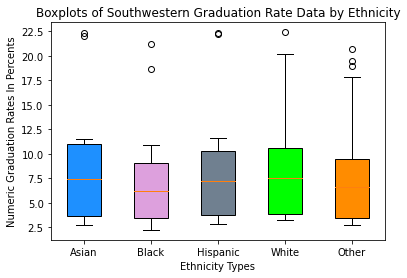

In [96]:
# Boxplots of Southwestern Graduation Rate Data by Ethinicity

Southwestern_boxplot_data = [Asian4, Black4, Hispanic4, White4, Other4]
SW = plt.boxplot(Southwestern_boxplot_data,patch_artist=True,labels=['Asian','Black','Hispanic','White', 'Other'])
colors = ['dodgerblue', 'plum', 'slategrey', 'lime', 'darkorange']
for patch, color in zip (SW['boxes'], colors):
    patch.set_facecolor(color)
    
plt.title('Boxplots of Southwestern Graduation Rate Data by Ethnicity')
plt.xlabel('Ethnicity Types')
plt.ylabel('Numeric Graduation Rates In Percents')

plt.show()

# There are five different boxplots based on ethnicity: Asian, Black, Hispanic, White, and Other. The Asian boxplot 
#showed two outliers, the Black boxplot had two outliers, the Hispanic boxplot had two outliers, the White boxplot had
#one outlier, and the Other boxplot had three outliers. The code I referenced to determine making boxplots was from 
# DataScience Made Simple website in an article titled "BOX PLOT IN PYTHON WITH MATPLOTLIB". Here is a link to the 
# website: https://www.datasciencemadesimple.com/box-plot-in-
#python/:~:text=boxplot%28%29%20function%20takes%20the%20data%20array%20to
#%20be,plotted.%20Create%20box%20plot%20in%20python%20with%20notch.

In [11]:
# Recategorizing County Name in Western Data with Numeric Values

Southwestern['County Name'] = Southwestern['County Name'].astype('category').cat.codes
Southwestern

# County Names were renamed 0-17.

,County Name,Organization Code,Organization Name,"""Class Of..."" Anticpated Year of Graduation Cohort",Number of Years After Entering High School,All Students Final Grad Base,All Students Graduates Total,All Students Graduation Rate,All Students Completers Total,All Students Completion Rate,...,Two or More Races Female Final Grad Base,Two or More Races Female Graduates,Two or More Races Female Graduation Rate,Two or More Races Female Completers Total,Two or More Races Female Completion Rate,Two or More Races Male Final Grad Base,Two or More Races Male Graduates,Two or More Races Male Graduation Rate,Two or More Races Male Completers Total,Two or More Races Male Completion Rate
34,0,100.0,Alamosa RE-11J,2019-2020,4.0,145.0,129.0,0.889655,129.0,0.889655,...,1.0,1.0,1.000000,1.0,1.00000,2.0,2.0,1.000000,2.0,1.000000
35,0,100.0,Alamosa RE-11J,2018-2019,5.0,171.0,149.0,0.871345,150.0,0.877193,...,3.0,3.0,1.000000,3.0,1.00000,0.0,0.0,0.818130,0.0,0.856530
36,0,100.0,Alamosa RE-11J,2017-2018,6.0,138.0,123.0,0.891304,126.0,0.913043,...,0.0,0.0,0.883445,0.0,0.90862,2.0,2.0,1.000000,2.0,1.000000
37,0,100.0,Alamosa RE-11J,2016-2017,7.0,134.0,110.0,0.820896,112.0,0.835821,...,0.0,0.0,0.883445,0.0,0.90862,1.0,1.0,1.000000,1.0,1.000000
38,0,110.0,Sangre De Cristo Re-22J,2019-2020,4.0,16.0,16.0,1.000000,16.0,1.000000,...,1.0,1.0,1.000000,1.0,1.00000,0.0,0.0,0.818130,0.0,0.856530
39,0,110.0,Sangre De Cristo Re-22J,2018-2019,5.0,20.0,20.0,1.000000,20.0,1.000000,...,0.0,0.0,0.883445,0.0,0.90862,0.0,0.0,0.818130,0.0,0.856530
40,0,110.0,Sangre De Cristo Re-22J,2017-2018,6.0,11.0,11.0,1.000000,11.0,1.000000,...,0.0,0.0,0.883445,0.0,0.90862,0.0,0.0,0.818130,0.0,0.856530
41,0,110.0,Sangre De Cristo Re-22J,2016-2017,7.0,19.0,19.0,1.000000,19.0,1.000000,...,0.0,0.0,0.883445,0.0,0.90862,1.0,1.0,1.000000,1.0,1.000000
70,1,220.0,Archuleta County 50 Jt,2019-2020,4.0,79.0,73.0,0.924051,73.0,0.924051,...,0.0,0.0,0.883445,0.0,0.90862,0.0,0.0,0.818130,0.0,0.856530
71,1,220.0,Archuleta County 50 Jt,2018-2019,5.0,83.0,73.0,0.879518,74.0,0.891566,...,1.0,0.0,0.000000,0.0,0.00000,1.0,1.0,1.000000,1.0,1.000000


In [12]:
# Graduation Rates by Ethnicity and Female in Southwestern region grouped to make Southwestern_Female data.

Southwestern_Female = Southwestern[["Asian Female Graduation Rate", "Black or African American Female Graduation Rate", "Hispanic or Latino Female Graduation Rate", "White Female Graduation Rate"]]
Southwestern_Female

# The ethnicities for Southwestern_Female are Asian, Black or African American,
# Hispanic or Latino, and White.

,Asian Female Graduation Rate,Black or African American Female Graduation Rate,Hispanic or Latino Female Graduation Rate,White Female Graduation Rate
34,1.000000,1.000000,0.927273,0.956522
35,1.000000,0.858173,0.823529,0.900000
36,1.000000,0.858173,1.000000,1.000000
37,1.000000,0.500000,0.815789,0.923077
38,0.921344,0.858173,1.000000,1.000000
39,0.921344,0.858173,1.000000,1.000000
40,0.921344,1.000000,1.000000,1.000000
41,0.921344,0.858173,1.000000,1.000000
70,1.000000,0.858173,1.000000,1.000000
71,0.921344,0.858173,0.916667,0.900000


In [13]:
# Graduation Rates by Ethnicity and Male in Southwestern region grouped to make Southwestern_Male data.

Southwestern_Male = Southwestern[["Asian Male Graduation Rate", "Black or African American Male Graduation Rate", "Hispanic or Latino Male Graduation Rate", "White Male Graduation Rate"]]
Southwestern_Male

# The ethnicities for Southwestern_Male are American Indian or Alaska Native, Asian, Black or African American,
# Hispanic or Latino, White, and Native Hawaiian or Other Pacific Islander.

,Asian Male Graduation Rate,Black or African American Male Graduation Rate,Hispanic or Latino Male Graduation Rate,White Male Graduation Rate
34,1.000000,0.745308,0.729730,0.950000
35,1.000000,0.000000,0.865385,0.937500
36,0.908986,0.500000,0.760870,0.850000
37,0.908986,1.000000,0.809524,0.700000
38,0.908986,0.745308,1.000000,1.000000
39,0.908986,0.745308,1.000000,1.000000
40,0.908986,0.745308,1.000000,1.000000
41,0.908986,0.745308,1.000000,1.000000
70,0.908986,0.745308,0.875000,0.838710
71,0.908986,0.000000,0.700000,0.958333


In [14]:
# Prediction of Southwestern by looking at the County Name Variable

prediction_col4 = Southwestern['County Name']
prediction_col4

# Predictions for prediction_col4 range from 0-17.

34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
70      1
71      1
72      1
73      1
130     2
131     2
132     2
133     2
134     2
135     2
136     2
137     2
138     2
139     2
140     2
141     2
142     3
143     3
144     3
145     3
146     3
147     3
       ..
592    14
593    14
594    14
595    14
596    14
597    14
598    14
599    14
600    14
601    14
602    15
603    15
604    15
605    15
606    16
607    16
608    16
609    16
610    16
611    16
612    16
613    16
626    17
627    17
628    17
629    17
630    17
631    17
632    17
633    17
Name: County Name, Length: 160, dtype: int8

In [15]:
# Prediction and Female Columns for Southwestern_Female ANN

x7=Southwestern_Female.values
y7=prediction_col4.values

# Dataset is split into training and testing dataset

x_train7, x_test7, y_train7, y_test7 = train_test_split(x7, y7, test_size=0.3, random_state=50)

# Dataset is split into 70:30 ratio.

In [16]:
# Data is scaled using StandardScaler
 
sc7 = StandardScaler()  


# Training and Testing data is created

x_train7 = sc7.fit_transform(x_train7)  
x_test7 = sc7.transform(x_test7) 

In [17]:
# Algorithm Created using Training Data

from sklearn.neural_network import MLPClassifier  

mlp7 = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=3000)  
mlp7.fit(x_train7, y_train7) 

# MLP Classifier has 3 hidden layer sizes of 100 and a max iteration of 3,000.

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=3000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [18]:
# Predictions are created for Southwestern_Female ANN Model

predictions_southwest = mlp7.predict(x_test7)
print(predictions_southwest)

# Predictions_southwest range from 0-17.

[14 12 14 10 10  1 10 15 10 10 10  0 10 10 14  9 10 10 14 10 14 10 12 10
 14  3 14 14 10 10 14 10 14 14 17  8 10  2  7  3 10  3  9  9  3 15  6 10]


In [19]:
# Evaluation of Southwestern_Female ANN Model

from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test7,predictions_southwest))  
print(classification_report(y_test7,predictions_southwest)) 

# Results show that there is an accuracy rate of 22% and an f1 rate of 14% for female graduation rate based on 
# ethnicity and Southwestern counties. The most accuracy counties was county 6 or Fremont County.
# The ANN code referenced was in "Week 5 - Artificial Neural Network (ANN)" from Regis University. Here is a link
# reference from the code: http://localhost:8888/notebooks/Downloads/FTE_Week5(2).ipynb.

[[0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 2 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0]
 [1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 4 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 4 0 0 0 3 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         1
           4       0.00   

/Users/benjaminreimer/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/benjaminreimer/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/benjaminreimer/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/benjaminreimer/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  '

In [21]:
# Decision Tree for Female Gradution Rate by Southwestern Counties

clf7 = DecisionTreeClassifier()
clf7 = clf7.fit(x_train7,y_train7)
y_pred7 = clf7.predict(x_test7)
print("Accuracy:",metrics.accuracy_score(y_test7, y_pred7))

# The Accuracy rate for the decision tree is 15%. The code referenced to make the decision tree was from Sonia Motwani's
# article titled "Decision Tree Implementation in Python with Example". Here is a link to the website:
# https://in.springboard.com/blog/decision-tree-implementation-in-python/.

Accuracy: 0.14583333333333334


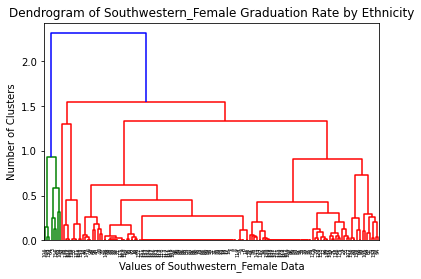

In [22]:
# Dendrogram of Southwestern_Female data

SW = Southwestern_Female.values
import scipy.cluster.hierarchy as sch
dendro = sch.dendrogram(sch.linkage(SW, method = 'ward'))
plt.title('Dendrogram of Southwestern_Female Graduation Rate by Ethnicity')
plt.xlabel('Values of Southwestern_Female Data')
plt.ylabel('Number of Clusters')

plt.show()


# Dendrogram shows that there would be a maximum of 3 clusters.

In [23]:
# Agglomerative Clustering looking at the Southwestern_Female Data

from sklearn.cluster import AgglomerativeClustering
hc7 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc7 = hc7.fit_predict(Southwestern_Female)
print(y_hc7)

# Predictions for number of clusters for Metro_Male are created from 0-1.

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 2 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 2 1 0 0 1]


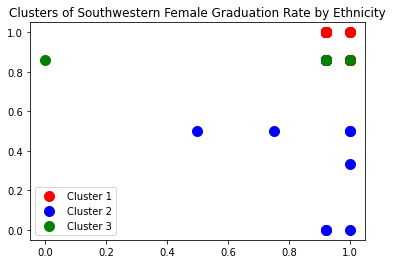

In [24]:
# Visualizing SW Clusters

plt.scatter(SW[y_hc7 == 0, 0], SW[y_hc7 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(SW[y_hc7 == 1, 0], SW[y_hc7 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(SW[y_hc7 == 2, 0], SW[y_hc7 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of Southwestern Female Graduation Rate by Ethnicity')
plt.legend()
plt.show()

# Two clusters of Southwestern Female Graduation Rate by Ethnicity are created. The code referenced for the three
# boxes of code above was from
# MLTut.com in an article titled "Hierarchical Clustering in Python, Step by Step Complete Guide". Here is a link
# to the article: https://www.mltut.com/hierarchical-clustering-in-python-
#step-by-step-complete guide/:~:text=The%20final%20cluster%20in%20the%20Hierarchical%20cluster%20co
#mbines,gained%20brief%20knowledge%20about%20Clustering%20and%20its%20types.

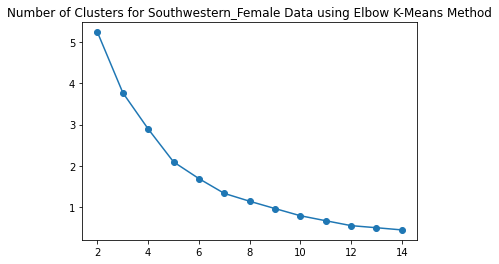

In [25]:
# Using Elbow Method to determine optimal number of clusters for Southwestern_Female Data

clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias = []

for c in clusters_range:
    kmeans = KMeans(init = 'k-means++', n_clusters=c, n_init=100, random_state=0).fit(Southwestern_Female)
    inertias.append(kmeans.inertia_)
    
plt.figure()
plt.plot(clusters_range, inertias, marker='o')
plt.title('Number of Clusters for Southwestern_Female Data using Elbow K-Means Method')
plt.show()

# The optimal number fo clusters appears to be 2 or 3. The code referenced was from 
# an Analytics Vidhya article titled "A Detailed Introduction to K-Means Clustering in Python!" Here is a link to the
# referenced code: https://www.analyticsvidhya.com/blog/2020/12/a-detailed-introduction-to-k-means-clustering-in-python/.

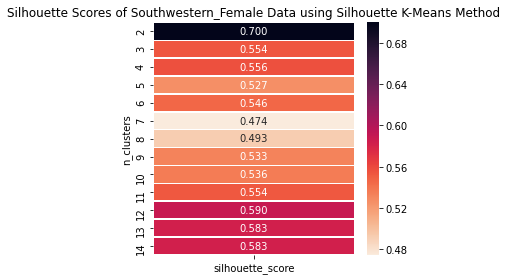

In [26]:
# Clusters using Silhouette Method for K-Means in Southwestern_Female Data

from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range = range(2,15)
results = []

for c in clusters_range:
    clusterer = KMeans(init='k-means++', n_clusters = c, n_init=100, random_state=0)
    cluster_labels = clusterer.fit_predict(Southwestern_Female)
    silhouette_avg = silhouette_score(Southwestern_Female, cluster_labels)
    results.append([c,silhouette_avg])
    
    
result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

plt.title('Silhouette Scores of Southwestern_Female Data using Silhouette K-Means Method')

plt.figure
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

# Results show that the optimal number of clusters is 2 with a silhouette score of 0.700. The code referenced was from 
# an Analytics Vidhya article titled "A Detailed Introduction to K-Means Clustering in Python!" Here is a link to the
# referenced code: https://www.analyticsvidhya.com/blog/2020/12/a-detailed-introduction-to-k-means-clustering-in-python/.

In [27]:
# Prediction and Female Columns for Southwestern_Male ANN

x8=Southwestern_Male.values
y8=prediction_col4.values

# Dataset is split into training and testing dataset

x_train8, x_test8, y_train8, y_test8 = train_test_split(x8, y8, test_size=0.3, random_state=50)

# Dataset is split into a 70:30 ratio.

In [28]:
# Data is scaled using StandardScaler
  
sc8 = StandardScaler()  


# Training and Testing data is created

x_train8 = sc8.fit_transform(x_train8)  
x_test8 = sc8.transform(x_test8) 

In [29]:
# Algorithm Created using Training Data

from sklearn.neural_network import MLPClassifier  

mlp8 = MLPClassifier(hidden_layer_sizes=(50, 50, 50), max_iter=3000)  
mlp8.fit(x_train8, y_train8) 

# MLP Classifier has 3 hidden layer sizes of 50 and a max iteration of 3,000.

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=3000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [30]:
# Predictions are created for Southwestern_Male ANN Model

predictions_southwest2 = mlp8.predict(x_test8)
print(predictions_southwest2)

# Predictions_southwest2 ranges from 0-17.

[ 0  1 11 14 10  6  8 16  0 11  6  1 10 14 11 11 10  3 11 17  4 12  6  0
 10  8 10  5  0 13  0  0  9 10 13 10 12  3  0  0  0 10 10 12 17 11  1  0]


In [32]:
# Evaluation of Southwestern_Male ANN Model

from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test8,predictions_southwest2))  
print(classification_report(y_test8,predictions_southwest2)) 

# Results show that there is an accuracy rate of 10% and an f1 rate of 10% for male graduation rate based on 
# ethnicity and Southwestern counties. The most accurate county was counties 6 and 10, or Fremont County and
# La Plata County. The ANN code referenced was in "Week 5 - Artificial Neural Network (ANN)" from Regis University. Here is a link
# reference from the code: http://localhost:8888/notebooks/Downloads/FTE_Week5(2).ipynb.

[[1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 2 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 2 0 1 0 0 0]
 [4 0 0 1 0 0 0 0 0 0 3 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1]
 [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0]]
              precision    recall  f1-score   support

           0       0.10      0.50      0.17         2
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         1
           4       0.00   

/Users/benjaminreimer/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/benjaminreimer/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/benjaminreimer/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/benjaminreimer/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  '

In [35]:
# Decision Tree for Male Gradution Rate by Southwestern Counties

clf8 = DecisionTreeClassifier()
clf8 = clf8.fit(x_train8,y_train8)
y_pred8 = clf8.predict(x_test8)
print("Accuracy:",metrics.accuracy_score(y_test8, y_pred8))

# The Accuracy rate for the decision tree is 13%. The code referenced to make the decision tree was from Sonia Motwani's
# article titled "Decision Tree Implementation in Python with Example". Here is a link to the website:
#  https://in.springboard.com/blog/decision-tree-implementation-in-python/.

Accuracy: 0.125


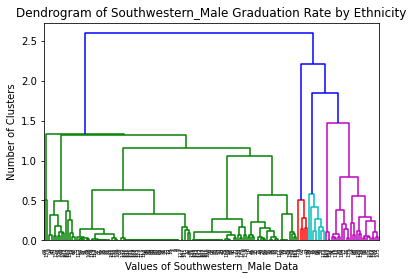

In [36]:
# Dendrogram of Southwestern_Male data

SM = Southwestern_Male.values
import scipy.cluster.hierarchy as sch
dendro = sch.dendrogram(sch.linkage(SM, method = 'ward'))
plt.title('Dendrogram of Southwestern_Male Graduation Rate by Ethnicity')
plt.xlabel('Values of Southwestern_Male Data')
plt.ylabel('Number of Clusters')

plt.show()

# Dendrogram shows that there would be a maximum of 2 clusters.

In [37]:
# Agglomerative Clustering looking at the Southwestern_Male Data

from sklearn.cluster import AgglomerativeClustering
hc8 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc8 = hc8.fit_predict(Southwestern_Male)
print(y_hc8)

# Predictions for number of clusters for Southwestern_Male are created from 0-1.

[1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0
 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 1 0 0 1 1 1]


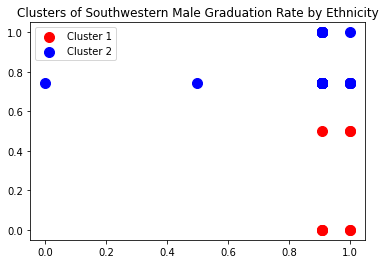

In [38]:
# Visualizing SM Clusters

plt.scatter(SM[y_hc8 == 0, 0], SM[y_hc8 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(SM[y_hc8 == 1, 0], SM[y_hc8 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('Clusters of Southwestern Male Graduation Rate by Ethnicity')
plt.legend()
plt.show()

# Two clusters of Southwestern Male Graduation Rate by Ethnicity are created. The code referenced for the three
# boxes of code was from
# MLTut.com in an article titled "Hierarchical Clustering in Python, Step by Step Complete Guide". Here is a link
# to the article: https://www.mltut.com/hierarchical-clustering-in-python-
# step-by-step-complete guide/:~:text=The%20final%20cluster%20in%20the%20Hierarchical%20cluster%20co
# mbines,gained%20brief%20knowledge%20about%20Clustering%20and%20its%20types.

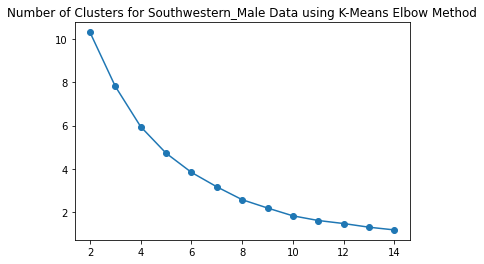

In [39]:
# Using Elbow Method to determine optimal number of clusters for Southwestern_Male Data

clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias = []

for c in clusters_range:
    kmeans = KMeans(init = 'k-means++', n_clusters=c, n_init=100, random_state=0).fit(Southwestern_Male)
    inertias.append(kmeans.inertia_)
    
plt.figure()
plt.plot(clusters_range, inertias, marker='o')
plt.title('Number of Clusters for Southwestern_Male Data using K-Means Elbow Method')
plt.show()

# The optimal number of clusters appears to be 2 or 3. The code referenced was from 
# an Analytics Vidhya article titled "A Detailed Introduction to K-Means Clustering in Python!" Here is a link to the
# referenced code: https://www.analyticsvidhya.com/blog/2020/12/a-detailed-introduction-to-k-means-clustering-in-python/.

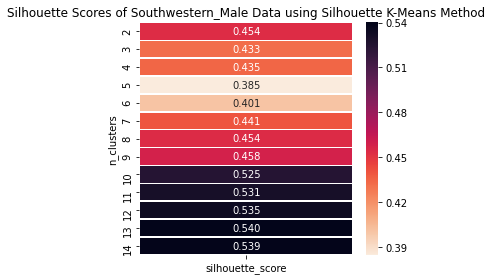

In [40]:
# Clusters using Silhouette Method for K-Means in Southwestern_Male Data

from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range = range(2,15)
results = []

for c in clusters_range:
    clusterer = KMeans(init='k-means++', n_clusters = c, n_init=100, random_state=0)
    cluster_labels = clusterer.fit_predict(Southwestern_Male)
    silhouette_avg = silhouette_score(Southwestern_Male, cluster_labels)
    results.append([c,silhouette_avg])
    
    
result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

plt.title('Silhouette Scores of Southwestern_Male Data using Silhouette K-Means Method')

plt.figure
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

# Results show that the optimal number of clusters is 13 with a silhouette score of 0.540. The code referenced was from 
# an Analytics Vidhya article titled "A Detailed Introduction to K-Means Clustering in Python!" Here is a link to the
# referenced code: https://www.analyticsvidhya.com/blog/2020/12/a-detailed-introduction-to-k-means-clustering-in-python/.